# Project: Wrangling and Analyze Data

In [1]:
#  import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup as bs
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#  twitter-archive-enhanced.csv file uploaded manually to jupyter notebook

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#  load file into a dataframe and check

twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#  download the tweet image prediction file image_predictions.tsv
#  programmatically using the Requests library and the provided URL

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

#  download the data behind the URL

response = requests.get(url)

#  write the response into a new file called image-predictions.tsv

with open("image-predictions.tsv", "wb") as file:
    file.write(response.content)

In [4]:
#  load image-predictions.tsv file into a df

image_predictions = pd.read_csv('image-predictions.tsv',sep = '\t')
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

Twitter declined providing access to the API

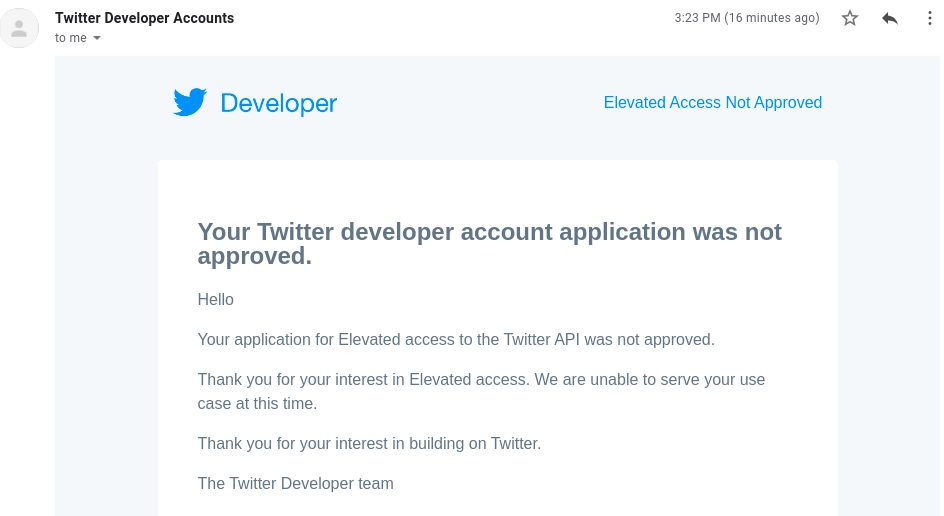

Using project provided files to complete the task

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
'''
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
'''

"\nconsumer_key = 'HIDDEN'\nconsumer_secret = 'HIDDEN'\naccess_token = 'HIDDEN'\naccess_secret = 'HIDDEN'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n"

In [6]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
'''
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file

with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\ntweet_ids = twitter_archive.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\n\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\n\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    \n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)\n'

In [7]:
#  reading JSON text file into twitter_json dataframe extracting tweet id, retweet count and favorite count
#  Note to reviewer: using Udacity instructor provided file 'tweet-json.txt'
#  References : https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8
#               https://btechgeeks.com/append-add-row-to-dataframe-in-pandas/#:~:text=append%20()%20method%20is%20used%20to%20append%20rows,and%20data%20of%20that%20column%20will%20become%20NAN.
#               https://www.geeksforgeeks.org/how-to-convert-dictionary-to-pandas-dataframe/
#               https://www.statology.org/valueerror-if-using-all-scalar-values-you-must-pass-an-index/#:~:text=ValueError:%20If%20using%20all%20scalar%20values,%20you%20must,error%20in%20practice.%20How%20to%20Reproduce%20the%20Error.


#  create dataframe to append JSON data
#  include column names in constructor to eliminate append erronous behaviour of changing column locations
#  reference: https://www.statology.org/pandas-change-column-order/

tweet_json = pd.DataFrame({'tweet_id':[], 'retweet_count':[],'favorite_count':[]}).astype(int)

#  loop line by line and append values to the created dataframe

with open('tweet-json.txt', 'r',encoding='utf-8') as file:
    for line in file:
        data=json.loads(line)
        lst_dict=({'tweet_id':data['id'], 'retweet_count':data['retweet_count'],'favorite_count':data['favorite_count']})
        tweet_json = tweet_json.append(pd.DataFrame.from_dict([lst_dict]), sort=False)


In [8]:
#  check generated dataframe

tweet_json.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
0  892177421306343426           6514           33819
0  891815181378084864           4328           25461
0  891689557279858688           8964           42908
0  891327558926688256           9774           41048

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



<a id='tidy'></a>
### Tidiness issues
Reference : https://www.jstatsoft.org/article/view/v059i10/

In his paper Hadley Wickham sets the standard for tackling data tidiness prior to data quality. In the abstract of the paper Wickham explains that: "Tidy datasets are easy to manipulate, model and visualize, and have a specific structure:
each variable is a column, each observation is a row, and each type of observational unit
is a table."


#### Visually Identified :
1. __twitter_archive DataFrame, tweet_json DataFrame and image_predictions Dataframe:__ all data frames compliment the same set of observations and need to be combined to make up a single observation unit.<p style="text-align:right;"><a href="#tidy1">go to details  <span>&#187;</span></a></p>

2. __twitter archive DataFrame:__ Dogtionary ratings split into columns instead of being properly assigned to rows under a single column 'Dogitionary ratings.<p style="text-align:right;"><a href="#tidy2">go to details  <span>&#187;</span></a></p>

### Quality issues
<a id='quality'></a>


1. Retweets observed in dataset and are to be excluded - *(Visually Identified)* 
<p style="text-align:right;"><a href="#quality1">go to details  <span>&#187;</span></a></p>

2. Empty Dog names observed in dataset - *(Visually Identified)* and<br>
Erroneous Dog names identified while cleaning issue 1 ('a','the', 'an', 'old', 'his') - *(Programmatically Identified)*
<p style="text-align:right;"><a href="#quality2">go to details  <span>&#187;</span></a></p>

3. Columns that are not usefull to the analysis were observed like :<br>
{'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',<br>
'retweeted_status_user_id','retweeted_status_timestamp' to be dropped} - *(Visually Identified)* 
<p style="text-align:right;"><a href="#quality3">go to details  <span>&#187;</span></a></p>

4. Observed columns with 'None' assigned instead of 'NaN' for empty/missing data - *(Visually Identified)* 
<p style="text-align:right;"><a href="#quality4">go to details  <span>&#187;</span></a></p>

5. Dog breed predictions column names not indicative, data in columns is not consistantley formatted (eg: P1, P2, P3) - *(Visually Identified)* 
<p style="text-align:right;"><a href="#quality5">go to details  <span>&#187;</span></a></p>

6. Multiple dogtionary ratings for the same observation - *(Visually Identified)* 
<p style="text-align:right;"><a href="#quality6">go to details  <span>&#187;</span></a></p>

7. Drop dogtionary rating columns and keep the concatanated column- *(Visually Identified)*
<p style="text-align:right;"><a href="#quality7">go to details  <span>&#187;</span></a></p>

8. Tweets missing retweet count and favorite count to check - *(Programmatically Identified)*
<p style="text-align:right;"><a href="#quality8">go to details  <span>&#187;</span></a></p>

9. Odd/Outlier values in numerator and denominator to verify and adjust - *(Programmatically Identified)*
<p style="text-align:right;"><a href="#quality9">go to details  <span>&#187;</span></a></p>

10. Strange predictions in P1, P2, P3 like: cliff , spatula, barrow, minibus, etc. to be assessed for sanity - *(Programmatically Identified)*
<p style="text-align:right;"><a href="#quality10">go to details  <span>&#187;</span></a></p>

11. timestamp field is a string - *(Programmatically Identified)*
<p style="text-align:right;"><a href="#quality11">go to details  <span>&#187;</span></a></p>

12.  tweet source is a hyperlink - reformat to source - *(Programmatically Identified)*
<p style="text-align:right;"><a href="#quality12">go to details  <span>&#187;</span></a></p>

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [9]:
#  make copies of original dataframes to work on

twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

<a id='tidy1'></a>
### Tidiness Issue #:1 twitter_archive DataFrame, tweet_json DataFrame and image_predictions Dataframe: all data frames compliment the same set of observations and need to be combined to make up a single observation unit

<p style="text-align:right;"><a href="#tidy"><span>&#171;</span>  back to list</a></p>

#### Define  
Combine twitter archive dataframe, tweet_json and image_predictions dataframes based on tweet id to create a master data frame for the observational unit with all observations as rows and all variables as columns

#### Code

In [10]:
#  twitter archive dataframe info

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#  tweet json dataframe info

tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 0
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB


In [12]:
#  image predictions dataframe info

image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
#  check for any duplicated tweet id's in twitter archive

twitter_archive_clean['tweet_id'].duplicated().sum()

0

In [14]:
#  check for any duplicated tweet id's in tweet json

tweet_json_clean['tweet_id'].duplicated().sum()

0

In [15]:
#  check for any duplicated tweet id's in image predictions

image_predictions_clean['tweet_id'].duplicated().sum()

0

In [16]:
#  merge tweet_json_clean into the twitter archive dataframe to create the master dataframe

twitter_master_df = twitter_archive_clean.merge(tweet_json_clean, how='left')


In [17]:
#  merge image predictions into the master dataframe to create the final dataframe to be used

twitter_master_df = twitter_master_df.merge(image_predictions_clean, how='left')


#### Test

In [18]:
#  check the master dataframe columns to include all combined dataframes

twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

> Data Quality Issues to be captured during the visual and programmatic steps

In [19]:
#  display the combined dataframes head and check 

twitter_master_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  ...    img_num  \
0  https://twitter.com/dog_rates/status/892420643...  ...        1.0   
1  https://twitter.com/dog_rates/status/892177421...  ...        1.0   
2  https://twitter.com/dog_rates/status/891815181...  ...        1.0   
3  https://twitter.com/dog_rates/status/891689557...  ...        1.0   
4  https://twitter.com/dog_rates/status/891327558...  ...        2.0   

            p1   p1_conf p1_dog                  p2   p2_conf p2_dog  \
0       orange  0.097049  False               bagel  0.085851  False   
1    Chihuahua  0.323581   True            Pekinese  0.090647   True   
2    Chihuahua  0.716012   True            malamute  0.078253   True   
3  paper_towel  0.170278  False  Labrador_retriever  0.168086   True   
4       basset  0.555712   True    English_springer  0.225770   True   

                            p3   p3_conf p3_dog  
0                       banana  0.076110  False  
1                     papillon  0.068957   True  
2                       kelpie  0.031379   True  
3                      spatula  0.040836  False  
4  German_short-haired_pointer  0.175219   True  

[5 rows x 30 columns]

<a id='tidy2'></a>
### Tidiness Issue #:2 __twitter archive DataFrame:__ Dogtionary ratings split into columns instead of being properly assigned to rows under a single column 'Dogitionary ratings'
<p style="text-align:right;"><a href="#tidy"><span>&#171;</span>  back to list</a></p>

#### Define:  
Dogtionary ratings in columns doggo, floofer, pupper, puppo are to be reassigned from 4 columns to a single column with data per row

#### Code

In [20]:
#  many none records observed in (doggo, floofer, pupper, puppo) , 
#  as the dogtionary ratings are predefined, try to rextract from tweet text
#  and confirm data sanity

twitter_master_df['dogtionary_rating'] = twitter_master_df['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)

#### Test

In [21]:
#  check dogtionary rating column

twitter_master_df[['doggo','floofer','pupper','puppo','dogtionary_rating']].sample(15)

doggo floofer  pupper  puppo dogtionary_rating
707   None    None    None   None               NaN
539   None    None    None   None               NaN
411   None    None    None   None               NaN
193   None    None    None   None               NaN
1665  None    None    None   None               NaN
326   None    None    None   None               NaN
438   None    None    None  puppo             puppo
278   None    None    None   None               NaN
2300  None    None    None   None               NaN
1935  None    None    None   None               NaN
1464  None    None  pupper   None            pupper
552   None    None    None   None               NaN
841   None    None    None   None               NaN
1093  None    None    None   None            pupper
2200  None    None    None   None               NaN

In [22]:
#  check dogtionary rating column values

twitter_master_df.dogtionary_rating.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dogtionary_rating, dtype: int64

> Visual Checks

In [23]:
#  display a sample and visually check for data sanity

twitter_master_df.sample(7)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1810  676821958043033607                    NaN                  NaN   
1522  690649993829576704                    NaN                  NaN   
1743  679405845277462528                    NaN                  NaN   
488   813944609378369540                    NaN                  NaN   
737   780858289093574656                    NaN                  NaN   
297   837110210464448512                    NaN                  NaN   
759   778396591732486144                    NaN                  NaN   

                      timestamp  \
1810  2015-12-15 17:51:44 +0000   
1522  2016-01-22 21:39:24 +0000   
1743  2015-12-22 20:59:10 +0000   
488   2016-12-28 03:08:11 +0000   
737   2016-09-27 19:54:58 +0000   
297   2017-03-02 01:20:01 +0000   
759   2016-09-21 00:53:04 +0000   

                                                 source  \
1810  <a href="http://twitter.com/download/iphone" r...   
1522  <a href="http://twitter.com/download/iphone" r...   
1743  <a href="http://vine.co" rel="nofollow">Vine -...   
488   <a href="http://twitter.com/download/iphone" r...   
737   <a href="http://twitter.com/download/iphone" r...   
297   <a href="http://twitter.com/download/iphone" r...   
759   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1810  Finally some constructive political change in ...                  NaN   
1522  This is Hazel. She's a gymnast. Training hard ...                  NaN   
1743  Crazy unseen footage from Jurassic Park. 10/10...                  NaN   
488   RT @dog_rates: This is Bruce. He never backs d...         7.902771e+17   
737   This is Dash. He's very stylish, but also incr...                  NaN   
297   This is Clark. He passed pupper training today...                  NaN   
759   RT @dog_rates: This is an East African Chalupa...         7.030419e+17   

      retweeted_status_user_id retweeted_status_timestamp  \
1810                       NaN                        NaN   
1522                       NaN                        NaN   
1743                       NaN                        NaN   
488               4.196984e+09  2016-10-23 19:42:02 +0000   
737                        NaN                        NaN   
297                        NaN                        NaN   
759               4.196984e+09  2016-02-26 02:20:37 +0000   

                                          expanded_urls        ...         \
1810  https://twitter.com/dog_rates/status/676821958...        ...          
1522  https://twitter.com/dog_rates/status/690649993...        ...          
1743                      https://vine.co/v/iKVFEigMLxP        ...          
488   https://twitter.com/dog_rates/status/790277117...        ...          
737   https://twitter.com/dog_rates/status/780858289...        ...          
297   https://twitter.com/dog_rates/status/837110210...        ...          
759   https://twitter.com/dog_rates/status/703041949...        ...          

                            p1   p1_conf p1_dog              p2   p2_conf  \
1810            Great_Pyrenees  0.869804   True          kuvasz  0.079814   
1522                   bighorn  0.215438  False           hyena  0.137928   
1743                       NaN       NaN    NaN             NaN       NaN   
488         Labrador_retriever  0.427742   True      Great_Dane  0.190503   
737   Chesapeake_Bay_retriever  0.488555   True  Sussex_spaniel  0.271655   
297             Siberian_husky  0.767696   True      Eskimo_dog  0.217079   
759               hippopotamus  0.581403  False         doormat  0.152445   

     p2_dog                      p3   p3_conf  p3_dog dogtionary_rating  
1810   True         standard_poodle  0.013263    True               NaN  
1522  False        Mexican_hairless  0.098171    True               NaN  
1743    NaN                     NaN       NaN     NaN            pupper  
488    True  curly-coated

> Programmatic check

In [24]:
#  display dataframe columns and data types

twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

In [25]:
#  check the rating numerator column

twitter_master_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [26]:
#  unresonable max observed, check the details for the values in the numerator column

twitter_master_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [27]:
#  check the rating denominator column

twitter_master_df.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [28]:
#  odd values observed, check the details for the values in the denominator column

twitter_master_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [29]:
#  check the dog names column

twitter_master_df.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Daisy          7
Bailey         7
Buddy          7
Toby           7
an             7
Leo            6
Jax            6
Bella          6
Scout          6
Dave           6
Oscar          6
Milo           6
Jack           6
Rusty          6
Stanley        6
Koda           6
Oakley         5
            ... 
Bookstore      1
Cora           1
Jeffrie        1
Alexander      1
Koko           1
Mac            1
Ebby           1
BeBe           1
Stuart         1
Goose          1
Diogi          1
Ralphé         1
Jarvis         1
Travis         1
Grizz          1
Murphy         1
Linus          1
Bertson        1
Flash          1
Enchilada      1
Shnuggles      1
Rover          1
Einstein       1
Binky          1
Tito           1
Pupcasso       1
Joshwa         1
Jerome        

In [30]:
#  check first predictions column

twitter_master_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
teddy                         18
Shetland_sheepdog             18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [31]:
#  check second predictions column

twitter_master_df.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
chow                               20
toy_terrier                        20
Samoyed                            20
miniature_pinscher                 20
malinois                           20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [32]:
#  check third predictions column

twitter_master_df.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

In [33]:
#  check first prediction dog or not flag

twitter_master_df.p1_dog.value_counts() 

True     1532
False     543
Name: p1_dog, dtype: int64

In [34]:
#  check second prediction dog or not flag

twitter_master_df.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [35]:
#  check third prediction dog or not flag

twitter_master_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [36]:
#  check first prediction confidence score

twitter_master_df.p1_conf.value_counts()

0.868671    2
0.479477    2
0.993830    2
0.274637    2
0.757547    2
0.403698    2
0.375098    2
0.611525    2
0.530104    2
0.809197    2
0.303415    2
0.713293    2
0.316565    2
0.254856    2
0.090341    2
0.861651    2
0.907083    2
0.556595    2
0.978833    2
0.938048    2
0.636169    2
0.700466    2
0.346545    2
0.533180    2
0.740220    2
0.581403    2
0.964929    2
0.617389    2
0.802333    2
0.366248    2
           ..
0.665238    1
0.573140    1
0.491022    1
0.537652    1
0.869804    1
0.730959    1
0.665578    1
0.841265    1
0.668164    1
0.839390    1
0.714719    1
0.506826    1
0.352946    1
0.713102    1
0.765266    1
0.905334    1
0.749368    1
0.672791    1
0.556524    1
0.483228    1
0.271109    1
0.449268    1
0.661178    1
0.738371    1
0.753521    1
0.432748    1
0.735480    1
0.315163    1
0.516257    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [37]:
#  check second prediction confidence score

twitter_master_df.p2_conf.value_counts()

0.069362    3
0.064897    2
0.271929    2
0.093940    2
0.251530    2
0.295690    2
0.197021    2
0.120358    2
0.153126    2
0.272734    2
0.171393    2
0.011584    2
0.130611    2
0.241929    2
0.190503    2
0.347609    2
0.192031    2
0.166246    2
0.052724    2
0.119256    2
0.150487    2
0.149950    2
0.193654    2
0.012763    2
0.181351    2
0.020089    2
0.052956    2
0.108382    2
0.083499    2
0.049995    2
           ..
0.083513    1
0.100988    1
0.119745    1
0.098354    1
0.389994    1
0.088474    1
0.139994    1
0.104256    1
0.052396    1
0.097456    1
0.074257    1
0.038062    1
0.131753    1
0.001001    1
0.005043    1
0.008604    1
0.169758    1
0.090938    1
0.203651    1
0.165772    1
0.139346    1
0.036575    1
0.229352    1
0.118181    1
0.000077    1
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.121377    1
Name: p2_conf, Length: 2004, dtype: int64

In [38]:
#  check third prediction confidence score

twitter_master_df.p3_conf.value_counts()

0.102595    2
0.011933    2
0.157130    2
0.082515    2
0.008554    2
0.003956    2
0.016497    2
0.186789    2
0.100842    2
0.121523    2
0.110592    2
0.014858    2
0.121626    2
0.157028    2
0.007850    2
0.041331    2
0.003330    2
0.077008    2
0.030943    2
0.087355    2
0.022977    2
0.044660    2
0.162084    2
0.047523    2
0.109677    2
0.096435    2
0.007499    2
0.048572    2
0.046403    2
0.015965    2
           ..
0.144614    1
0.019044    1
0.002099    1
0.047601    1
0.019516    1
0.051835    1
0.078720    1
0.024269    1
0.143328    1
0.090899    1
0.000436    1
0.003383    1
0.109454    1
0.024007    1
0.132820    1
0.083643    1
0.056137    1
0.105442    1
0.093412    1
0.098207    1
0.075492    1
0.011452    1
0.063088    1
0.179200    1
0.095197    1
0.008473    1
0.122123    1
0.101537    1
0.065257    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

In [39]:
#  check dogtionary rating doggo

twitter_master_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [40]:
#  check dogtionary rating floofer

twitter_master_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [41]:
#  check dogtionary rating pupper

twitter_master_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [42]:
#  check dogtionary rating puppo

twitter_master_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

<a id='quality1'></a>
### Quality Issue #1:  Retweets are observed in dataset and are to be excluded
<p style="text-align:right;"><a href="#quality"><span>&#171;</span>  back to list</a></p>

#### Define

Drop all retweeted tweets for retweeted status not null. 
Check for tweets starting with 'RT' and drop identified retweets

#### Code

In [43]:
#  identify the number of retweeted rows

twitter_master_df.query('retweeted_status_id != "NaN"')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
73    878404777348136964                    NaN                  NaN   
74    878316110768087041                    NaN                  NaN   
78    877611172832227328                    NaN                  NaN   
91    874434818259525634                    NaN                  NaN   
95    873697596434513921                    NaN                  NaN   
97    873337748698140672                    NaN                  NaN   
101   872668790621863937                    NaN                  NaN   
109   871166179821445120                    NaN                  NaN   
118   869988702071779329                    NaN                  NaN   
124   868639477480148993                    NaN                  NaN   
130   867072653475098625                    NaN                  NaN   
132   866816280283807744                    NaN                  NaN   
137   866094527597207552                    NaN                  NaN   
146   863471782782697472                    NaN                  NaN   
155   861769973181624320                    NaN                  NaN   
159   860981674716409858                    NaN                  NaN   
160   860924035999428608                    NaN                  NaN   
165   860177593139703809                    NaN                  NaN   
171   858860390427611136                    NaN                  NaN   
180   857062103051644929                    NaN                  NaN   
182   856602993587888130                    NaN                  NaN   
185   856330835276025856                    NaN                  NaN   
194   855245323840757760                    NaN                  NaN   
195   855138241867124737                    NaN                  NaN   
204   852936405516943360                    NaN                  NaN   
211   851953902622658560                    NaN                  NaN   
...                  ...                    ...                  ...   
784   775096608509886464                    NaN                  NaN   
794   773336787167145985                    NaN                  NaN   
800   772615324260794368                    NaN                  NaN   
811   771171053431250945                    NaN                  NaN   
815   771004394259247104                    NaN                  NaN   
818   770743923962707968                    NaN                  NaN   
822   770093767776997377                    NaN                  NaN   
826   769335591808995329                    NaN                  NaN   
829   768909767477751808                    NaN                  NaN   
833   768554158521745409                    NaN                  NaN   
841   766864461642756096                    NaN                  NaN   
847   766078092750233600                    NaN                  NaN   
860   763167063695355904                    NaN                  NaN   
868   761750502866649088                    NaN                  NaN   
872   761371037149827077                    NaN                  NaN   
885   760153949710192640                    NaN                  NaN   
890   759566828574212096                    NaN                  NaN   
895   759159934323924993                    NaN                  NaN   
908   757729163776290825                    NaN                  NaN   
911   757597904299253760                    NaN                  NaN   
926   754874841593970688                    NaN                  NaN   
937   753298634498793472                    NaN                  NaN   
943   752701944171524096                    NaN                  NaN   
949   752309394570878976                    NaN         

In [44]:
#  drop retweeted tweet rows

twitter_master_df.drop(twitter_master_df.query('retweeted_status_id != "NaN"').index, inplace=True)

#### Test

In [45]:
#  check if rows were dropped

twitter_master_df.query('retweeted_status_id != "NaN"').count()[0]

0

In [46]:
#  check if any missed text starting with "RT"

twitter_master_df['text'].str.startswith("RT").sum()

2

In [47]:
#  check text data in rows starting with "RT"

twitter_master_df[twitter_master_df['text'].str.startswith("RT") & twitter_master_df.retweeted_status_id.isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1286  708400866336894977                    NaN                  NaN   
1860  675489971617296384                    NaN                  NaN   

                      timestamp  \
1286  2016-03-11 21:15:02 +0000   
1860  2015-12-12 01:38:53 +0000   

                                                 source  \
1286  <a href="http://vine.co" rel="nofollow">Vine -...   
1860  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1286  RT if you are as ready for summer as this pup ...                  NaN   
1860  RT until we find this dog. Clearly a cool dog ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1286                       NaN                        NaN   
1860                       NaN                        NaN   

                                          expanded_urls        ...         \
1286                      https://vine.co/v/iHFqnjKVbIQ        ...          
1860  https://twitter.com/dog_rates/status/675489971...        ...          

                               p1   p1_conf p1_dog         p2   p2_conf  \
1286                          NaN       NaN    NaN        NaN       NaN   
1860  West_Highland_white_terrier  0.139613   True  seat_belt  0.118647   

     p2_dog                    p3   p3_conf  p3_dog dogtionary_rating  
1286    NaN                   NaN       NaN     NaN               NaN  
1860  False  Old_English_sheepdog  0.093952    True               NaN  

[2 rows x 31 columns]

###  check actual tweet to understand content

### tweet https://twitter.com/dog_rates/status/708400866336894977
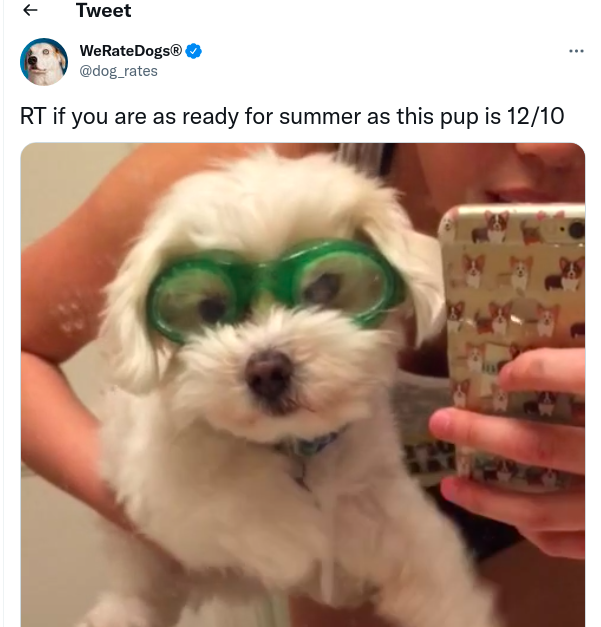



### tweet https://twitter.com/dog_rates/status/675489971617296384
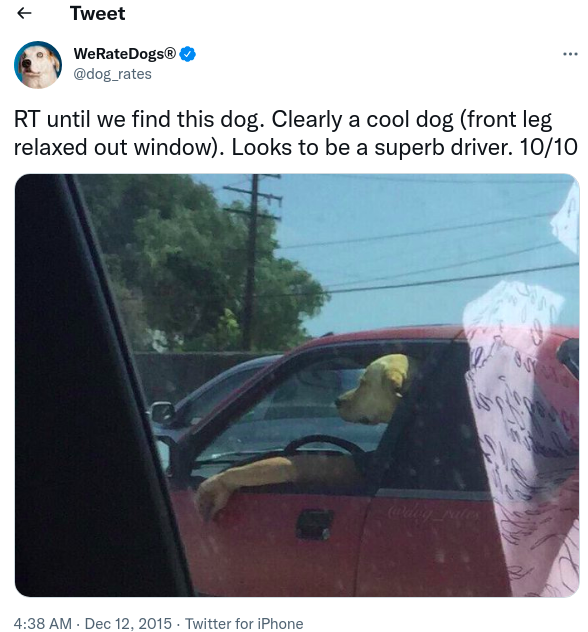

The two tweets appear to have legitimate ratings

> Retweeted rows dropped



In [48]:
#  one more check for text data in rows containing "RT"

twitter_master_df[twitter_master_df['text'].str.contains("RT")]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
80    877316821321428993                    NaN                  NaN   
959   751251247299190784                    NaN                  NaN   
985   749075273010798592                    NaN                  NaN   
1037  744709971296780288                    NaN                  NaN   
1116  732585889486888962                    NaN                  NaN   
1182  718971898235854848                    NaN                  NaN   
1286  708400866336894977                    NaN                  NaN   
1650  683515932363329536                    NaN                  NaN   
1766  678399652199309312                    NaN                  NaN   
1860  675489971617296384                    NaN                  NaN   
1991  672622327801233409                    NaN                  NaN   

                      timestamp  \
80    2017-06-21 00:06:44 +0000   
959   2016-07-08 03:07:09 +0000   
985   2016-07-02 03:00:36 +0000   
1037  2016-06-20 01:54:27 +0000   
1116  2016-05-17 14:57:41 +0000   
1182  2016-04-10 01:20:33 +0000   
1286  2016-03-11 21:15:02 +0000   
1650  2016-01-03 05:11:12 +0000   
1766  2015-12-20 02:20:55 +0000   
1860  2015-12-12 01:38:53 +0000   
1991  2015-12-04 03:43:54 +0000   

                                                 source  \
80    <a href="http://twitter.com/download/iphone" r...   
959   <a href="http://twitter.com/download/iphone" r...   
985   <a href="http://vine.co" rel="nofollow">Vine -...   
1037  <a href="http://twitter.com/download/iphone" r...   
1116  <a href="http://twitter.com/download/iphone" r...   
1182  <a href="http://twitter.com/download/iphone" r...   
1286  <a href="http://vine.co" rel="nofollow">Vine -...   
1650  <a href="http://vine.co" rel="nofollow">Vine -...   
1766  <a href="http://twitter.com/download/iphone" r...   
1860  <a href="http://twitter.com/download/iphone" r...   
1991  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
80    Meet Dante. At first he wasn't a fan of his ne...                  NaN   
959   This is Gilbert. He's being chased by a battal...                  NaN   
985   This is Boomer. He's self-baptizing. Other dog...                  NaN   
1037  This is Harvey. He's stealthy af. 10/10 would ...                  NaN   
1116  When your teacher agreed on 10,000 RTs and no ...                  NaN   
1182  This is Sadie. She is prepared for battle. 10/...                  NaN   
1286  RT if you are as ready for summer as this pup ...                  NaN   
1650  HEY PUP WHAT'S THE PART OF THE HUMAN BODY THAT...                  NaN   
1766  This made my day. 12/10 please enjoy https://t...                  NaN   
1860  RT until we find this dog. Clearly a cool dog ...                  NaN   
1991  This lil pupper is sad because we haven't foun...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
80                         NaN                        NaN   
959                        NaN                        NaN   
985                        NaN                        NaN   
1037                       NaN                        NaN   
1116                       NaN                        NaN   
1182                       NaN                        NaN   
1286                       NaN                        NaN   
1650                       NaN                        NaN   
1766                       NaN                        NaN   
1860                       NaN                        NaN   
1991                       NaN                        NaN   

                                          expanded_urls        ...         \
80    https://twitter.com/dog_rates/status/877316821...        ...          
959   https://twitter.com/dog_rates/status/751251247...        ...          
985                       https://vine.co/v/5ztZvHgI17r        ...          
1037  https://twitt

check index 1116 tweet id 732585889486888962 as the tweet does not follow the rating tweets format
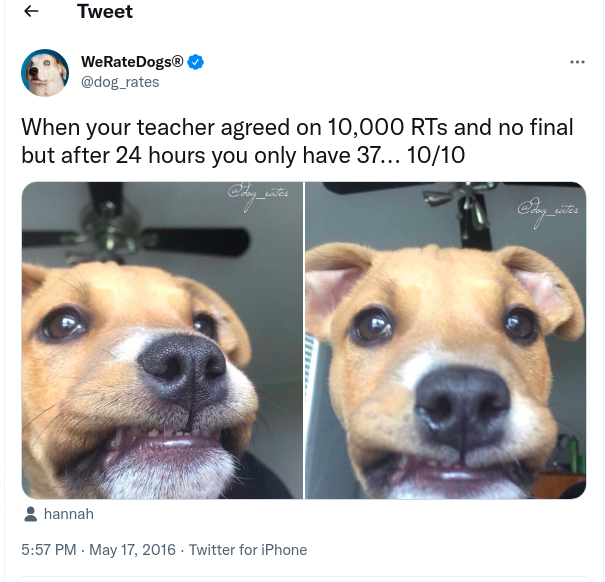

check index 1650 tweet id 683515932363329536 as the tweet does not follow the rating tweets format
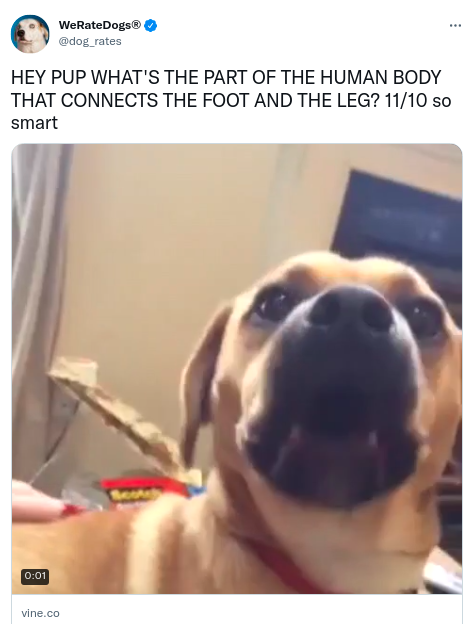

check index 1766 tweet id 678399652199309312 as the tweet does not follow the rating tweets format
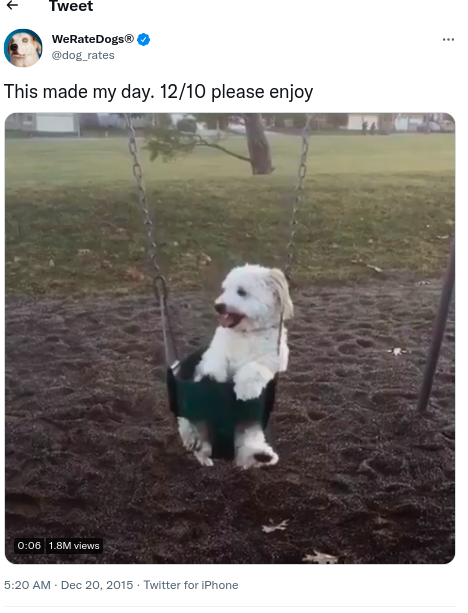

check index 1991 tweet id 672622327801233409 as the tweet does not follow the rating tweets format
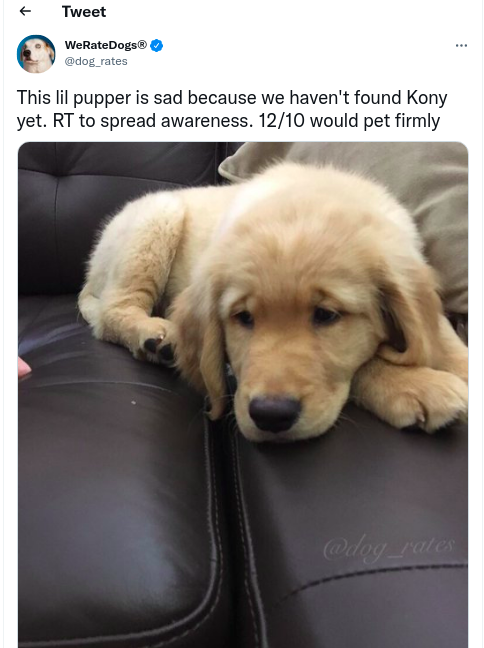

Rows are observed to have legitimate rating values despite not following the regular rating format

<a id='quality2'></a>
### Quality Issue #2:  Empty and Erroneous  Dog names observed in the dataset name column
<p style="text-align:right;"><a href="#quality"><span>&#171;</span>  back to list</a></p>

#### Define

Identify rows with no dog names or with weird names and adjust values as per tweet text

#### Code

In [49]:
#check dog name column 

twitter_master_df['name'].value_counts()

None         680
a             55
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Winston        8
Lola           8
the            8
Sadie          8
Daisy          7
Toby           7
an             6
Oscar          6
Stanley        6
Bailey         6
Bo             6
Bella          6
Koda           6
Jax            6
Rusty          5
Bentley        5
Milo           5
Scout          5
Leo            5
Buddy          5
Chester        5
Louis          5
            ... 
Marvin         1
Nugget         1
Nollie         1
Blakely        1
Joshwa         1
Pupcasso       1
Tito           1
Binky          1
William        1
Lucia          1
Stella         1
Birf           1
Hermione       1
Lili           1
Goose          1
Diogi          1
Ralphé         1
Jarvis         1
Travis         1
Grizz          1
Murphy         1
Linus          1
Happy          1
Bertson        1
Stuart         1
Flash          1
Shnuggles      1
Rover         

In [50]:
#  replace None dog name rows with NaN

twitter_master_df['name'].replace('None', np.nan, inplace = True)

In [51]:
#  identify non dog tweet ratings, observed "we only rate dogs"  
#  and "stop sending photos without" in a few tweets

twitter_master_df.text.str.contains("without dogs|Please only send dogs|Please don't send|please stop sending pictures without").sum()

20

In [52]:
#  drop non dog related tweets based on observed response trends


twitter_master_df = twitter_master_df[~twitter_master_df.text.str.contains("without dogs|Please only send dogs|Please don't send|please stop sending pictures without")]


In [53]:
#  observed that names start with an uppercase and erroneous name are lowcaps - filter low caps names

lowcaps_list = []
for x in twitter_master_df['name'].unique():
    if str(x).islower() == True:
        lowcaps_list.append(x)

In [54]:
# list and check

lowcaps_list

[nan,
 'such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [55]:
#  replace lowcaps list with NaN

twitter_master_df['name'].replace(lowcaps_list, np.nan, inplace = True)

In [56]:
# check names list

twitter_master_df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


In [57]:
#  observed 1 and 2 letter names, filter and check 2 letter names and smaller

twitter_master_df[twitter_master_df['name'].str.len() <= 2]['name'].unique()

array(['Mo', 'Bo', 'O', 'Al', 'Ed', 'JD', 'Jo'], dtype=object)

In [58]:
#  compile values into a list 
caps_list = twitter_master_df[twitter_master_df['name'].str.len() <= 2]['name'].unique()
len(caps_list)

7

In [59]:
#  check tweet text for the 57 identified names
twitter_master_df.query('name in @caps_list')[['name','text']]

name                                               text
393    Mo  This is Mo. No one will push him around in the...
449    Bo  This is Bo. He was a very good First Doggo. 14...
553    Bo  This is Bo. He's going to make me cry. 13/10 p...
679    Bo  This is Bo. He's a West Congolese Bugaboop Snu...
775     O  This is O'Malley. That is how he sleeps. Doesn...
820    Al  Meet Al Cabone. He's a gangsta puppa. Rather h...
876    Bo  This is Bo and Ty. Bo eats paper and Ty felt l...
978    Bo  This is Bo. He emanates happiness. 12/10 I cou...
1683   Bo  This is Bo. He's a Benedoop Cumbersnatch. Seem...
1988   Ed  This is Ed. He's not mad, just disappointed. 1...
2041   JD  This is JD (stands for "just dog"). He's like ...
2219   Jo  This is Jo. Jo is a Swedish Queso. Tongue bigg...

In [60]:
# index 775 needs to be adjusted from O to O'Malley

twitter_master_df.loc[775,'name'] = "O'Malley"

In [61]:
# index 820 needs to be adjusted from Al to Al Cabone

twitter_master_df.loc[820,'name'] = "Al Cabone"

In [62]:
# index 876 contains two dogs

twitter_master_df[twitter_master_df['name'] == 'Bo'].loc[876]

tweet_id                                                     761004547850530816
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-08-04 01:03:17 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bo and Ty. Bo eats paper and Ty felt l...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/761004547...
rating_numerator                                                             11
rating_denominator                                                           10
name                                    

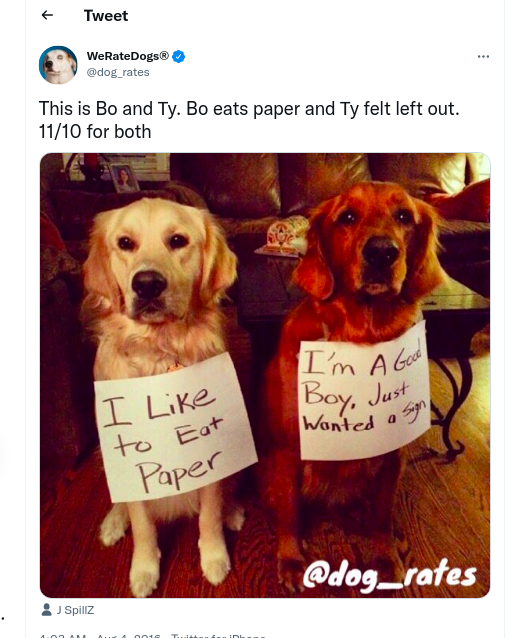

No change required as rating is per dog

#### Test

In [63]:
#  check O'Malley updated

twitter_master_df.loc[775,'name']

"O'Malley"

In [64]:
#  check al cabone updated

twitter_master_df.loc[820,'name'] 

'Al Cabone'

In [65]:
#  filter on non dog tweets based on observed trends

twitter_master_df.text.str.contains("without dogs|Please only send dogs|Please don't send|please stop sending pictures without").sum()

0

In [66]:
#  check name column

twitter_master_df['name'].value_counts()

Lucy         11
Charlie      11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Lola          8
Winston       8
Sadie         8
Daisy         7
Toby          7
Jax           6
Koda          6
Oscar         6
Stanley       6
Bailey        6
Bo            6
Bella         6
Rusty         5
Scout         5
Milo          5
Bentley       5
Leo           5
Chester       5
Buddy         5
Louis         5
Dave          5
Jack          4
Sophie        4
Brody         4
             ..
Marvin        1
Nugget        1
Nollie        1
Blakely       1
Jerome        1
Pupcasso      1
Lucia         1
Tito          1
Stella        1
Birf          1
Hermione      1
Lili          1
Goose         1
Diogi         1
Meyer         1
Ralphé        1
Jarvis        1
Travis        1
Grizz         1
Murphy        1
Linus         1
Happy         1
Bertson       1
Stuart        1
Flash         1
Shnuggles     1
Rover         1
Einstein      1
Binky         1
Crawford      1
Name: name, Length: 930,

<a id='quality3'></a>
### Quality Issue #3: Columns with no analytical value to be dropped
<p style="text-align:right;"><a href="#quality"><span>&#171;</span>  back to list</a></p>

#### Define: 

Identify the required columns for the analysis and drop columns that will not needed like : 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' to be dropped.<br>

*NB: doggo, floofer, pupper, puppo columns to be handled separately*

#### Code

In [67]:
#  display dataframe info

twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2155 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2155 non-null object
source                        2155 non-null object
text                          2155 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2097 non-null object
rating_numerator              2155 non-null int64
rating_denominator            2155 non-null int64
name                          1391 non-null object
doggo                         2155 non-null object
floofer                       2155 non-null object
pupper                        2155 non-null object
puppo                         2155 non-null object
retweet_count                 2155 non

In [68]:
#  drop reply , retweeted columns

twitter_master_df = twitter_master_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', \
                        'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

In [69]:
#  confirm changes

twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id              2155 non-null int64
timestamp             2155 non-null object
source                2155 non-null object
text                  2155 non-null object
expanded_urls         2097 non-null object
rating_numerator      2155 non-null int64
rating_denominator    2155 non-null int64
name                  1391 non-null object
doggo                 2155 non-null object
floofer               2155 non-null object
pupper                2155 non-null object
puppo                 2155 non-null object
retweet_count         2155 non-null float64
favorite_count        2155 non-null float64
jpg_url               1974 non-null object
img_num               1974 non-null float64
p1                    1974 non-null object
p1_conf               1974 non-null float64
p1_dog                1974 non-null object
p2                    1974 non-null object
p2_conf               1974 non-n

In [70]:
#  check expanded urls, jpg url and imag num columns

twitter_master_df[['expanded_urls','jpg_url','img_num']].head()

expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643...   
1  https://twitter.com/dog_rates/status/892177421...   
2  https://twitter.com/dog_rates/status/891815181...   
3  https://twitter.com/dog_rates/status/891689557...   
4  https://twitter.com/dog_rates/status/891327558...   

                                           jpg_url  img_num  
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0  
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0  
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0  
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0  
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0

In [71]:
#  drop img_num column

twitter_master_df = twitter_master_df.drop(['img_num'], axis=1)


#### Test

In [72]:
#  check

twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2155 non-null int64
timestamp             2155 non-null object
source                2155 non-null object
text                  2155 non-null object
expanded_urls         2097 non-null object
rating_numerator      2155 non-null int64
rating_denominator    2155 non-null int64
name                  1391 non-null object
doggo                 2155 non-null object
floofer               2155 non-null object
pupper                2155 non-null object
puppo                 2155 non-null object
retweet_count         2155 non-null float64
favorite_count        2155 non-null float64
jpg_url               1974 non-null object
p1                    1974 non-null object
p1_conf               1974 non-null float64
p1_dog                1974 non-null object
p2                    1974 non-null object
p2_conf               1974 non-null float64
p2_dog                1974 non-n

In [73]:
#  check rows

twitter_master_df.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer        ...                   p1  \
0                  10   Phineas  None    None        ...               orange   
1                  10     Tilly  None    None        ...            Chihuahua   
2                  10    Archie  None    None        ...            Chihuahua   
3                  10     Darla  None    None        ...          paper_towel   
4                  10  Franklin  None    None        ...               basset   

    p1_conf  p1_dog                  p2   p2_conf p2_dog  \
0  0.097049   False               bagel  0.085851  False   
1  0.323581    True            Pekinese  0.090647   True   
2  0.716012    True            malamute  0.078253   True   
3  0.170278   False  Labrador_retriever  0.168086   True   
4  0.555712    True    English_springer  0.225770   True   

                            p3   p3_conf p3_dog  dogtionary_rating  
0                       banana  0.076110  False                NaN  
1                     papillon  0.068957   True                NaN  
2                       kelpie  0.031379   True                NaN  
3                      spatula  0.040836  False                NaN  
4  German_short-haired_pointer  0.175219   True                NaN  

[5 rows x 25 columns]

<a id='quality4'></a>
### Quality Issue #4: Columns with 'None' and 'nan' assigned instead of Numpy 'NaN' for empty/missing data
<p style="text-align:right;"><a href="#quality"><span>&#171;</span>  back to list</a></p>

#### Define

Update all missing record values in all columns to NaN instead of None / nan

#### Code

In [74]:
#  replace missing values with numpy NaN

twitter_master_df=twitter_master_df.replace(('None','nan'), np.nan)

#### Test

In [75]:
# confirm changes

twitter_master_df.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer        ...                   p1  \
0                  10   Phineas   NaN     NaN        ...               orange   
1                  10     Tilly   NaN     NaN        ...            Chihuahua   
2                  10    Archie   NaN     NaN        ...            Chihuahua   
3                  10     Darla   NaN     NaN        ...          paper_towel   
4                  10  Franklin   NaN     NaN        ...               basset   

    p1_conf  p1_dog                  p2   p2_conf p2_dog  \
0  0.097049   False               bagel  0.085851  False   
1  0.323581    True            Pekinese  0.090647   True   
2  0.716012    True            malamute  0.078253   True   
3  0.170278   False  Labrador_retriever  0.168086   True   
4  0.555712    True    English_springer  0.225770   True   

                            p3   p3_conf p3_dog  dogtionary_rating  
0                       banana  0.076110  False                NaN  
1                     papillon  0.068957   True                NaN  
2                       kelpie  0.031379   True                NaN  
3                      spatula  0.040836  False                NaN  
4  German_short-haired_pointer  0.175219   True                NaN  

[5 rows x 25 columns]

In [76]:
twitter_master_df.describe()

tweet_id  rating_numerator  rating_denominator  retweet_count  \
count  2.155000e+03       2155.000000         2155.000000    2155.000000   
mean   7.363788e+17         13.236659           10.497448    2726.988399   
std    6.699948e+16         47.945561            7.051434    4637.617003   
min    6.660209e+17          0.000000            0.000000       0.000000   
25%    6.766970e+17         10.000000           10.000000     603.500000   
50%    7.092073e+17         11.000000           10.000000    1325.000000   
75%    7.879251e+17         12.000000           10.000000    3129.500000   
max    8.924206e+17       1776.000000          170.000000   79515.000000   

       favorite_count      p1_conf       p2_conf       p3_conf  
count     2155.000000  1974.000000  1.974000e+03  1.974000e+03  
mean      8600.234339     0.593390  1.345413e-01  6.041417e-02  
std      11934.547661     0.272377  1.008018e-01  5.103405e-02  
min         52.000000     0.044333  1.011300e-08  1.740170e-10  
25%       1880.000000     0.360437  5.407533e-02  1.612658e-02  
50%       4004.000000     0.587357  1.175870e-01  4.967815e-02  
75%      10900.000000     0.846896  1.953582e-01  9.208967e-02  
max     132810.000000     1.000000  4.880140e-01  2.734190e-01

<a id='quality5'></a>
### Quality Issue #5: Dog breed predictions column names not indicative, data in columns is not consistantley formatted (eg: P1, P2, P3)
<p style="text-align:right;"><a href="#quality"><span>&#171;</span>  back to list</a></p>

#### Define

Check column names and rename column headers to be explicit and consistant

#### Code

In [77]:
#Check column names

twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2155 non-null int64
timestamp             2155 non-null object
source                2155 non-null object
text                  2155 non-null object
expanded_urls         2097 non-null object
rating_numerator      2155 non-null int64
rating_denominator    2155 non-null int64
name                  1391 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
retweet_count         2155 non-null float64
favorite_count        2155 non-null float64
jpg_url               1974 non-null object
p1                    1974 non-null object
p1_conf               1974 non-null float64
p1_dog                1974 non-null object
p2                    1974 non-null object
p2_conf               1974 non-null float64
p2_dog                1974 non-null obj

In [78]:
#  renaming columns explicitly 
#  confidence score as CS used instead of conf

twitter_master_df.rename(columns={'source': 'tweet_source', 'text':'tweet_text', 'name':'dog_name',\
                  'p1':'first_image_prediction', 'p2':'second_image_prediction',\
                  'p3':'third_image_prediction', 'p1_conf':'first_prediction_cs',\
                  'p2_conf':'second_prediction_cs', 'p3_conf':'third_prediction_cs', \
                  'p1_dog':'first_prediction_is_a_dog', 'p2_dog':'second_prediction_is_a_dog',\
                  'p3_dog':'third_prediction_is_a_dog'}, inplace=True)

#### Test

In [79]:
#  check changes

twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id                      2155 non-null int64
timestamp                     2155 non-null object
tweet_source                  2155 non-null object
tweet_text                    2155 non-null object
expanded_urls                 2097 non-null object
rating_numerator              2155 non-null int64
rating_denominator            2155 non-null int64
dog_name                      1391 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
retweet_count                 2155 non-null float64
favorite_count                2155 non-null float64
jpg_url                       1974 non-null object
first_image_prediction        1974 non-null object
first_prediction_cs           1974 non-null float64
first_prediction_is_a_dog     197

<a id='quality6'></a>
### Quality Issue #6: Multiple dogtionary ratings for the same observation
<p style="text-align:right;"><a href="#quality"><span>&#171;</span>  back to list</a></p>

#### Define:

doggo, floofer, pupper, puppo observed to contain multiple values for a single observation. concatenate all observations into the dogtionary_rating column.
Drop the doggo, floofer, pupper, puppo post confirmation

#### Code

In [80]:
#  check columns for consistancy

twitter_master_df.doggo.value_counts(), twitter_master_df.floofer.value_counts(), \
twitter_master_df.pupper.value_counts(), twitter_master_df.puppo.value_counts()

(doggo    87
 Name: doggo, dtype: int64, floofer    10
 Name: floofer, dtype: int64, pupper    234
 Name: pupper, dtype: int64, puppo    25
 Name: puppo, dtype: int64)

In [81]:
#  create comparison column

twitter_master_df['compare'] = twitter_master_df['doggo'].fillna('0') + twitter_master_df['floofer'].fillna('0') \
+twitter_master_df['pupper'].fillna('0') + twitter_master_df['puppo'].fillna('0')

In [82]:
#  display comparison column values

twitter_master_df.compare.value_counts()

0000              1811
00pupper0          224
doggo000            75
000puppo            24
doggo0pupper0       10
0floofer00           9
doggo00puppo         1
doggofloofer00       1
Name: compare, dtype: int64

In [83]:
#  fix compare column fields for comparison

twitter_master_df['compare'].replace('0000',np.nan)
twitter_master_df['compare'].replace('00pupper0','pupper', inplace=True)
twitter_master_df['compare'].replace('doggo000','doggo', inplace=True)
twitter_master_df['compare'].replace('000puppo','puppo', inplace=True)
twitter_master_df['compare'].replace('doggo0pupper0','doggo, pupper', inplace=True)
twitter_master_df['compare'].replace('0floofer00','floofer', inplace=True)
twitter_master_df['compare'].replace('doggofloofer00','doggo, floofer', inplace=True)
twitter_master_df['compare'].replace('doggo00puppo','doggo, puppo', inplace=True)

In [84]:
#  expand column width to 140 characters to display the complete text of the tweet_text

pd.set_option('display.max_colwidth',140)


#  compare differences to identify issues

twitter_master_df.query('compare!="0000" and dogtionary_rating != compare')[['tweet_text','dogtionary_rating','compare']]

tweet_text  \
71    This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t...   
172   I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the frid...   
191   Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for h...   
200   At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send ...   
323                                                                  DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE 10/10 https://t.co/ffIH2WxwF0   
448                     This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb   
449                                   This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1   
460   This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodo...   
531   Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/AN...   
556                                                                                      Pupper hath acquire enemy. 13/10 https://t.co/ns9qoElfsX   
565                                                                         Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze   
575   This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55...   
705   This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautio...   
733                                                                                    Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile bac...   
807                                                                                          Doggo will persevere. 13/10\nhttps://t.co/yOVzAomJ6k   
889   Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MY...   
945                                                    Hooman used Pokeball\n*wiggle*\n*wiggle*\nDoggo broke free \n10/10 https://t.co/bWSgqnwSHr   
956      Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8   
984   This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB   
989                                         Say hello to Divine Doggo. Must be magical af. 13/10 would be an honor to pet https://t.co/BbcABzohKb   
996                                                                           SWIM AWAY PUPPER SWIM AWAY 13/10 #BarkWeek  https://t.co/QGGhZoTcwy   
1049   This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa   
1063                                                  This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC   
1091         Just wanted to share this super rare Rainbow Floofer in case you guys haven't seen it yet. 13/10 colorful af https://t.co/CaG9MzD3WT   
1110                                      This is Moose. He's a Polynesian Floofer. Dapper af. 10/10 would pet diligently https://t.co/mVfqRdppTL   
1113                                                                   Like father (doggo), like son (pupper). B

In [85]:
#  identified indices to check
#  71 , 172 , 191 , 200 , 323 , 448 , 449 , 460 , 531 , 556 , 565 , 575 , 705 , 733 , 
#  763 , 807 , 889 , 945 , 956 , 984 , 989 , 996 , 1049 , 1063 , 1091 , 1110 , 1113 , 
#  1410 , 1534 , 1614 , 1985

In [86]:
# index 71 needs to be adjusted to puppo as puppo was in the tag

twitter_master_df.loc[71,'dogtionary_rating'] = "puppo"

In [87]:
# index 172 needs to be adjusted to doggo spelling error confused regex pattern

twitter_master_df.loc[172,'dogtionary_rating'] = "doggo"

In [88]:
# index 191 text check reveals a typo - no changes on dogtionary_rating

In [89]:
# index 200 needs tweet text indicates it is an owl not a dog 
# check

twitter_master_df.loc[200]

tweet_id                                                                                                                                               854010172552949760
timestamp                                                                                                                                       2017-04-17 16:34:26 +0000
tweet_source                                                                           <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
tweet_text                    At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send ...
expanded_urls                             https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1
rating_numerator                                                                                                                                      

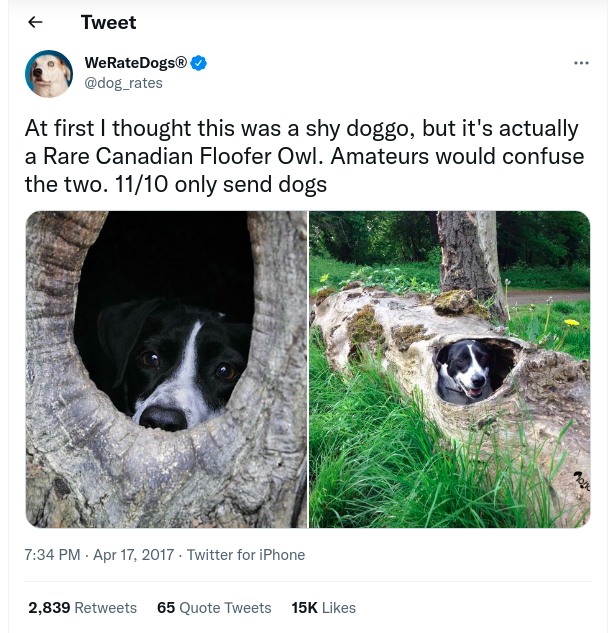

no need to change dogtionary_rating as it is correctly classified as a doggo

In [90]:
# index 323 needs to be adjusted to doggo caps not recognized by regex pattern

twitter_master_df.loc[323,'dogtionary_rating'] = "doggo"

In [91]:
# index 448 needs to be adjusted to doggo - confused regex pattern

twitter_master_df.loc[448,'dogtionary_rating'] = "doggo"

In [92]:
# index 449 needs to be adjusted to doggo - confused regex pattern

twitter_master_df.loc[449,'dogtionary_rating'] = "doggo"

In [93]:
# index 460 needs to be adjusted as per tweet text

twitter_master_df.loc[460,'dogtionary_rating'] = "pupper"

In [94]:
# index 531 needs to be adjusted two dogs rated in tweet

twitter_master_df.loc[531,'dogtionary_rating'] = "doggo, pupper"

In [95]:
# index 556 needs to be adjusted to pupper spelling error confused regex pattern

twitter_master_df.loc[556,'dogtionary_rating'] = "pupper"

In [96]:
# index 565 needs to be adjusted to doggo, pupper

twitter_master_df.loc[565,'dogtionary_rating'] = "doggo, pupper"

In [97]:
# index 575 tweet text reveals wrong extraction as the dog is a pupper

twitter_master_df.loc[575,'dogtionary_rating'] = "pupper"

In [98]:
# index 705 not changes required as per tweet text

In [99]:
# index 733 two dogs rated in the tweet - update

twitter_master_df.loc[733,'dogtionary_rating'] = "doggo, pupper"

In [100]:
# index 763 needs to be adjusted to pupper

twitter_master_df.loc[763,'dogtionary_rating'] = "pupper"

In [101]:
# index 807 needs to be adjusted to doggo

twitter_master_df.loc[807,'dogtionary_rating'] = "doggo"

In [102]:
# index 889 needs to be adjusted to doggo, pupper two dogs in tweet

twitter_master_df.loc[889,'dogtionary_rating'] = "doggo, pupper"

In [103]:
# index 945 needs to be adjusted to doggo

twitter_master_df.loc[945,'dogtionary_rating'] = "doggo"

In [104]:
# index 956 to be dropped as it does not rate the dog
#  get tweet id

twitter_master_df.loc[956]

tweet_id                                                                                                                                            751583847268179968
timestamp                                                                                                                                    2016-07-09 01:08:47 +0000
tweet_source                                                                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
tweet_text                    Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8
expanded_urls                                                                                          https://twitter.com/dog_rates/status/751583847268179968/photo/1
rating_numerator                                                                                                                                                     

In [105]:
#  drop row

twitter_master_df.drop(twitter_master_df.query('tweet_id == "751583847268179968"').index, inplace=True)


In [106]:
# index 984 needs to be adjusted to floofer

twitter_master_df.loc[984,'dogtionary_rating'] = "floofer"

In [107]:
# index 989 needs to be adjusted to doggo 

twitter_master_df.loc[989,'dogtionary_rating'] = "doggo"

In [108]:
# index 996 needs to be adjusted to pupper

twitter_master_df.loc[996,'dogtionary_rating'] = "pupper"

In [109]:
# index 1049 needs to be adjusted to pupper

twitter_master_df.loc[1049,'dogtionary_rating'] = "pupper"

In [110]:
# index 1063 needs to be adjusted to doggo, pupper - two dogs rated

twitter_master_df.loc[1063,'dogtionary_rating'] = "doggo, pupper"

In [111]:
# index 1091 needs to be adjusted to floofer

twitter_master_df.loc[1091,'dogtionary_rating'] = "floofer"

In [112]:
# index 1110 needs to be adjusted to floofer

twitter_master_df.loc[1110,'dogtionary_rating'] = "floofer"

In [113]:
# index 1113 needs to be adjusted to doggo, pupper - two dogs rated

twitter_master_df.loc[1113,'dogtionary_rating'] = "doggo, pupper"

In [114]:
# index 1410 needs to be adjusted to pupper

twitter_master_df.loc[1410,'dogtionary_rating'] = "pupper"

In [115]:
# index 1534 needs to be adjusted to floofer

twitter_master_df.loc[1534,'dogtionary_rating'] = "floofer"

In [116]:
# index 1614 needs to be adjusted to floofer

twitter_master_df.loc[1614,'dogtionary_rating'] = "floofer"

In [117]:
# index 1985 needs to be adjusted to pupper

twitter_master_df.loc[1985,'dogtionary_rating'] = "pupper"

##### Test

In [118]:
#  check

twitter_master_df.query('compare!="0000" and dogtionary_rating != compare')[['tweet_text','dogtionary_rating','compare']]

tweet_text  \
191  Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for h...   
200  At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send ...   
460  This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodo...   
575  This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55...   
705  This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautio...   

    dogtionary_rating         compare  
191             puppo    doggo, puppo  
200             doggo  doggo, floofer  
460            pupper   doggo, pupper  
575            pupper   doggo, pupper  
705             doggo   doggo, pupper

<a id='quality7'></a>
### Quality Issue #7: Drop dogtionary ratings columns and keep the concatanated column
<p style="text-align:right;"><a href="#quality"><span>&#171;</span>  back to list</a></p>

#### Define

Drop doggo, puppo, pupper, floofer and check column 'compare' post concatantion

#### Code

In [119]:
#  drop dog ratings and maintain dogtionary rating column post verification

twitter_master_df.drop(['doggo', 'puppo','pupper', \
                        'floofer','compare'], axis=1, inplace=True)

#### Test

In [120]:
#  check

twitter_master_df.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                                         tweet_source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                    tweet_text  \
0                                This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/...   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/w...   
3                                      This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWe...   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator  dog_name  retweet_count  \
0                13                  10   Phineas         8853.0   
1                13                  10     Tilly         6514.0   
2                12                  10    Archie         4328.0   
3                13                  10     Darla         8964.0   
4                12                  10  Franklin         9774.0   

   favorite_count        ...        first_image_prediction  \
0         39467.0        ...                        orange   
1         33819.0        ...                     Chihuahua   
2         25461.0        ...                     Chihuahua   
3         42908.0        ...                   paper_towel   
4         41048.0        ...                        basset   

  first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
0            0.097049                      False                   bagel   
1            0.323581                       True                Pekinese   
2            0.716012                       True                malamute   
3            0.170278                      False      Labrador_retriever   
4            0.555712                       True        English_springer   

  second_prediction_cs  second_prediction_is_a_dog  \
0             0.085851                       False   
1             0.090647                        True   
2             0.078253                        True   
3             0.168086      

<a id='quality8'></a>
### Quality Issue #8: Tweets missing retweet count and favorite count to be checked
<p style="text-align:right;"><a href="#quality"><span>&#171;</span>  back to list</a></p>

#### Define 

check for the two tweets previously identfied with missing retweet and favorite count and update the values

#### Code

In [121]:
# filter on 0 value tweet and favorite

twitter_master_df.query('retweet_count == 0 or favorite_count == 0')

tweet_id                  timestamp  \
291  838085839343206401  2017-03-04 17:56:49 +0000   

                                                                           tweet_source  \
291  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                          tweet_text  \
291  @bragg6of8 @Andy_Pace_ we are still looking for the first 15/10   

    expanded_urls  rating_numerator  rating_denominator dog_name  \
291           NaN                15                  10      NaN   

     retweet_count  favorite_count        ...        first_image_prediction  \
291            0.0           150.0        ...                           NaN   

    first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
291                 NaN                        NaN                     NaN   

    second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
291                  NaN                         NaN                    NaN   

    third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
291                 NaN                        NaN               NaN  

[1 rows x 21 columns]

Upon checking the actual tweet, this row is to be dropped
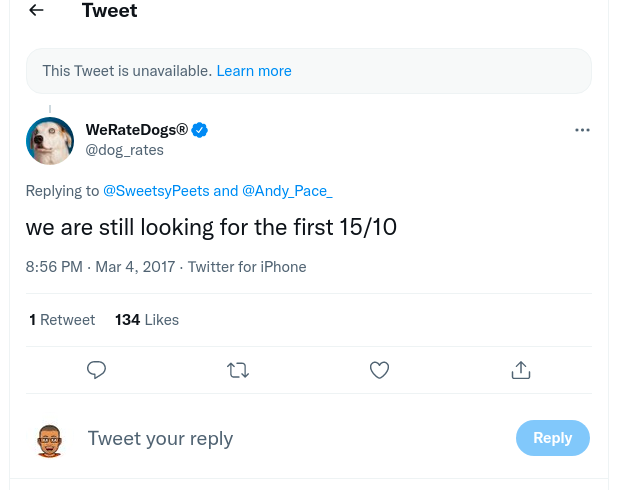

In [122]:
# drop row

twitter_master_df.drop(twitter_master_df.query('retweet_count == 0 or favorite_count == 0').index, inplace=True)

#### Test

In [123]:
#  check
twitter_master_df.query('retweet_count == 0 or favorite_count == 0')

Empty DataFrame
Columns: [tweet_id, timestamp, tweet_source, tweet_text, expanded_urls, rating_numerator, rating_denominator, dog_name, retweet_count, favorite_count, jpg_url, first_image_prediction, first_prediction_cs, first_prediction_is_a_dog, second_image_prediction, second_prediction_cs, second_prediction_is_a_dog, third_image_prediction, third_prediction_cs, third_prediction_is_a_dog, dogtionary_rating]
Index: []

[0 rows x 21 columns]

<a id='quality9'></a>
### Quality Issue #9: Odd/Outlier values in numerator and denominator to verify and adjust
<p style="text-align:right;"><a href="#quality"><span>&#171;</span>  back to list</a></p>

#### Define

Check outlier values and confirm data sanity

#### Code

In [124]:
#  check numerator statistics

twitter_master_df['rating_numerator'].describe()

count    2153.000000
mean       13.239666
std        47.967492
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [125]:
# 13.2 is the mean, check values above 13

numerator_check = twitter_master_df.query('rating_numerator > 13').index
for x in numerator_check:
    print(twitter_master_df.loc[x][['tweet_id','tweet_text','rating_numerator']].values)


[890240255349198849
 'This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A'
 14]
[887517139158093824
 "I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba"
 14]
[885518971528720385
 'I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk'
 14]
[884441805382717440
 'I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC'
 14]
[881633300179243008
 '@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s'
 17]
[881536004380872706
 'Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF'
 14]
[879674319642796034 '@RealKentMurphy 14/10 confirmed' 14]
[8

In [126]:
#  identified 24 tweet id's with issues
# 881633300179243008 
# 855862651834028034 
# 855860136149123072 
# 838150277551247360
# 835246439529840640
# 810984652412424192
# 786709082849828864
# 778027034220126208
# 758467244762497024
# 749981277374128128
# 731156023742988288
# 716439118184652801
# 713900603437621249
# 710658690886586372
# 709198395643068416
# 704054845121142784
# 697463031882764288
# 684225744407494656
# 684222868335505415
# 682808988178739200
# 680494726643068929
# 677716515794329600
# 675853064436391936
# 670842764863651840
# 820690176645140481

In [127]:
#  tweet id: 881633300179243008

twitter_master_df.query('tweet_id == 881633300179243008')

tweet_id                  timestamp  \
55  881633300179243008  2017-07-02 21:58:53 +0000   

                                                                          tweet_source  \
55  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                     tweet_text  \
55  @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s   

   expanded_urls  rating_numerator  rating_denominator dog_name  \
55           NaN                17                  10      NaN   

    retweet_count  favorite_count        ...        first_image_prediction  \
55            7.0           129.0        ...                           NaN   

   first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
55                 NaN                        NaN                     NaN   

   second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
55                  NaN                         NaN                    NaN   

   third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
55                 NaN                        NaN               NaN  

[1 rows x 21 columns]

In [128]:
# fix rating numerator to 13

twitter_master_df.loc[twitter_master_df.query('tweet_id == 881633300179243008').index,'rating_numerator'] = 13

In [129]:
#  tweet id: 881633300179243008 ##CHECK##

twitter_master_df.query('tweet_id == 881633300179243008')

tweet_id                  timestamp  \
55  881633300179243008  2017-07-02 21:58:53 +0000   

                                                                          tweet_source  \
55  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                     tweet_text  \
55  @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s   

   expanded_urls  rating_numerator  rating_denominator dog_name  \
55           NaN                13                  10      NaN   

    retweet_count  favorite_count        ...        first_image_prediction  \
55            7.0           129.0        ...                           NaN   

   first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
55                 NaN                        NaN                     NaN   

   second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
55                  NaN                         NaN                    NaN   

   third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
55                 NaN                        NaN               NaN  

[1 rows x 21 columns]

In [130]:
#  tweet id: 855862651834028034

twitter_master_df.query('tweet_id == 855862651834028034')



tweet_id                  timestamp  \
188  855862651834028034  2017-04-22 19:15:32 +0000   

                                                                           tweet_source  \
188  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                 tweet_text  \
188  @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research   

    expanded_urls  rating_numerator  rating_denominator dog_name  \
188           NaN               420                  10      NaN   

     retweet_count  favorite_count        ...        first_image_prediction  \
188           27.0           320.0        ...                           NaN   

    first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
188                 NaN                        NaN                     NaN   

    second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
188                  NaN                         NaN                    NaN   

    third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
188                 NaN                        NaN               NaN  

[1 rows x 21 columns]

Not a rating 
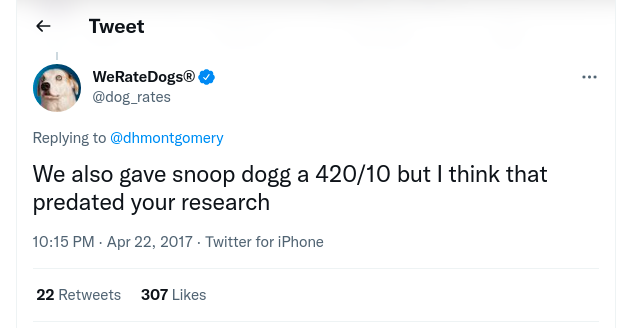

In [131]:
#  drop row

twitter_master_df.drop(twitter_master_df.query('tweet_id == "855862651834028034"').index, inplace=True)

#  tweet id: 855862651834028034 ##CHECK##

twitter_master_df.query('tweet_id == 855862651834028034')

Empty DataFrame
Columns: [tweet_id, timestamp, tweet_source, tweet_text, expanded_urls, rating_numerator, rating_denominator, dog_name, retweet_count, favorite_count, jpg_url, first_image_prediction, first_prediction_cs, first_prediction_is_a_dog, second_image_prediction, second_prediction_cs, second_prediction_is_a_dog, third_image_prediction, third_prediction_cs, third_prediction_is_a_dog, dogtionary_rating]
Index: []

[0 rows x 21 columns]

In [132]:
#  tweet id: 855860136149123072

twitter_master_df.query('tweet_id == 855860136149123072')


tweet_id                  timestamp  \
189  855860136149123072  2017-04-22 19:05:32 +0000   

                                                                           tweet_source  \
189  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                tweet_text  \
189  @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10   

    expanded_urls  rating_numerator  rating_denominator dog_name  \
189           NaN               666                  10      NaN   

     retweet_count  favorite_count        ...        first_image_prediction  \
189         1058.0          4407.0        ...                           NaN   

    first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
189                 NaN                        NaN                     NaN   

    second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
189                  NaN                         NaN                    NaN   

    third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
189                 NaN                        NaN               NaN  

[1 rows x 21 columns]

Cannot verify original tweet
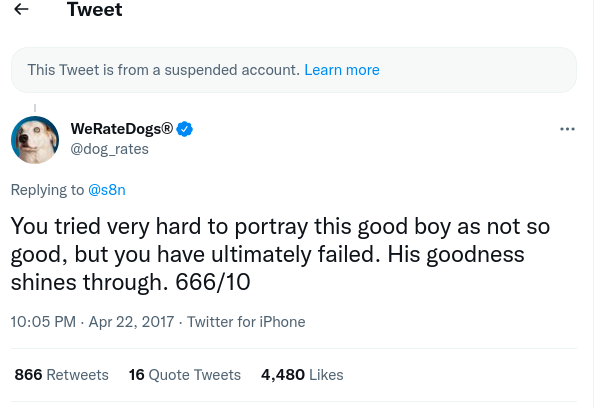

In [133]:
#  drop row

twitter_master_df.drop(twitter_master_df.query('tweet_id == "855860136149123072"').index, inplace=True)

#  tweet id: 855862651834028034 ##CHECK##

twitter_master_df.query('tweet_id == 855860136149123072')

Empty DataFrame
Columns: [tweet_id, timestamp, tweet_source, tweet_text, expanded_urls, rating_numerator, rating_denominator, dog_name, retweet_count, favorite_count, jpg_url, first_image_prediction, first_prediction_cs, first_prediction_is_a_dog, second_image_prediction, second_prediction_cs, second_prediction_is_a_dog, third_image_prediction, third_prediction_cs, third_prediction_is_a_dog, dogtionary_rating]
Index: []

[0 rows x 21 columns]

In [134]:
#  tweet id: 838150277551247360

twitter_master_df.query('tweet_id == 838150277551247360')

tweet_id                  timestamp  \
290  838150277551247360  2017-03-04 22:12:52 +0000   

                                                                           tweet_source  \
290  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

             tweet_text expanded_urls  rating_numerator  rating_denominator  \
290  @markhoppus 182/10           NaN               182                  10   

    dog_name  retweet_count  favorite_count        ...         \
290      NaN          370.0          1824.0        ...          

    first_image_prediction first_prediction_cs  first_prediction_is_a_dog  \
290                    NaN                 NaN                        NaN   

    second_image_prediction second_prediction_cs  second_prediction_is_a_dog  \
290                     NaN                  NaN                         NaN   

    third_image_prediction third_prediction_cs  third_prediction_is_a_dog  \
290                    NaN                 NaN                        NaN   

    dogtionary_rating  
290               NaN  

[1 rows x 21 columns]

cannot verify original tweet
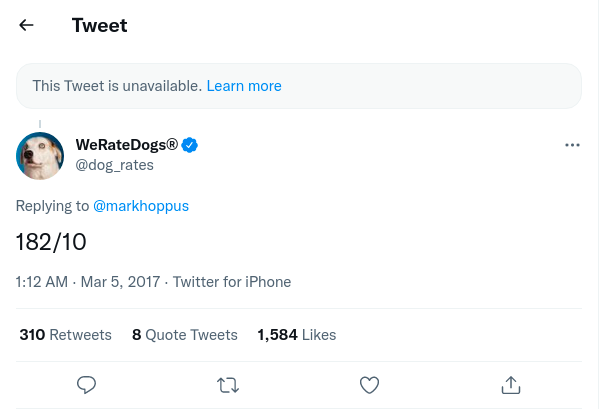

In [135]:
#  drop row

twitter_master_df.drop(twitter_master_df.query('tweet_id == "838150277551247360"').index, inplace=True)

#  tweet id: 838150277551247360 ##CHECK##

twitter_master_df.query('tweet_id == 838150277551247360')

Empty DataFrame
Columns: [tweet_id, timestamp, tweet_source, tweet_text, expanded_urls, rating_numerator, rating_denominator, dog_name, retweet_count, favorite_count, jpg_url, first_image_prediction, first_prediction_cs, first_prediction_is_a_dog, second_image_prediction, second_prediction_cs, second_prediction_is_a_dog, third_image_prediction, third_prediction_cs, third_prediction_is_a_dog, dogtionary_rating]
Index: []

[0 rows x 21 columns]

In [136]:
#  tweet id: 835246439529840640

twitter_master_df.query('tweet_id == 835246439529840640')

tweet_id                  timestamp  \
313  835246439529840640  2017-02-24 21:54:03 +0000   

                                                                           tweet_source  \
313  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                             tweet_text  \
313  @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   

    expanded_urls  rating_numerator  rating_denominator dog_name  \
313           NaN               960                   0      NaN   

     retweet_count  favorite_count        ...        first_image_prediction  \
313           83.0          2259.0        ...                           NaN   

    first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
313                 NaN                        NaN                     NaN   

    second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
313                  NaN                         NaN                    NaN   

    third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
313                 NaN                        NaN               NaN  

[1 rows x 21 columns]

In [137]:
# fix rating numerator to 13 and denominator to 10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 835246439529840640').index, \
                      ['rating_numerator','rating_denominator']] = 13,10

In [138]:
#  tweet id: 835246439529840640 ##CHECK##

twitter_master_df.query('tweet_id == 835246439529840640')

tweet_id                  timestamp  \
313  835246439529840640  2017-02-24 21:54:03 +0000   

                                                                           tweet_source  \
313  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                             tweet_text  \
313  @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   

    expanded_urls  rating_numerator  rating_denominator dog_name  \
313           NaN                13                  10      NaN   

     retweet_count  favorite_count        ...        first_image_prediction  \
313           83.0          2259.0        ...                           NaN   

    first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
313                 NaN                        NaN                     NaN   

    second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
313                  NaN                         NaN                    NaN   

    third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
313                 NaN                        NaN               NaN  

[1 rows x 21 columns]

In [139]:
#  tweet id: 810984652412424192

twitter_master_df.query('tweet_id == 810984652412424192')

tweet_id                  timestamp  \
516  810984652412424192  2016-12-19 23:06:23 +0000   

                                                                           tweet_source  \
516  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                      tweet_text  \
516  Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/9...   

                                                                                           expanded_urls  \
516  https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1   

     rating_numerator  rating_denominator dog_name  retweet_count  \
516                24                   7      Sam         1655.0   

     favorite_count        ...        first_image_prediction  \
516          5927.0        ...              golden_retriever   

    first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
516            0.871342                       True         Tibetan_mastiff   

    second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
516             0.036708                        True     Labrador_retriever   

    third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
516            0.025823                       True               NaN  

[1 rows x 21 columns]

In [140]:
#   not a rating  -  drop row

twitter_master_df.drop(twitter_master_df.query('tweet_id == "810984652412424192"').index, inplace=True)

#  tweet id: 810984652412424192 ##CHECK##

twitter_master_df.query('tweet_id == 810984652412424192')

Empty DataFrame
Columns: [tweet_id, timestamp, tweet_source, tweet_text, expanded_urls, rating_numerator, rating_denominator, dog_name, retweet_count, favorite_count, jpg_url, first_image_prediction, first_prediction_cs, first_prediction_is_a_dog, second_image_prediction, second_prediction_cs, second_prediction_is_a_dog, third_image_prediction, third_prediction_cs, third_prediction_is_a_dog, dogtionary_rating]
Index: []

[0 rows x 21 columns]

In [141]:
#  tweet id: 786709082849828864

twitter_master_df.query('tweet_id == 786709082849828864')

tweet_id                  timestamp  \
695  786709082849828864  2016-10-13 23:23:56 +0000   

                                                                           tweet_source  \
695  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                           tweet_text  \
695  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   

                                                       expanded_urls  \
695  https://twitter.com/dog_rates/status/786709082849828864/photo/1   

     rating_numerator  rating_denominator dog_name  retweet_count  \
695                75                  10    Logan         7069.0   

     favorite_count        ...        first_image_prediction  \
695         20296.0        ...                    Pomeranian   

    first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
695            0.467321                       True             Persian_cat   

    second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
695             0.122978                       False                   chow   

    third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
695            0.102654                       True               NaN  

[1 rows x 21 columns]

In [142]:
# fix rating numerator to 10 as all ratings are integers round up 9.75 to be inline with the dataframe ratings

twitter_master_df.loc[twitter_master_df.query('tweet_id == 786709082849828864').index,'rating_numerator'] = 10

In [143]:
#  tweet id: 786709082849828864 ##CHECK##

twitter_master_df.query('tweet_id == 786709082849828864')

tweet_id                  timestamp  \
695  786709082849828864  2016-10-13 23:23:56 +0000   

                                                                           tweet_source  \
695  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                           tweet_text  \
695  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   

                                                       expanded_urls  \
695  https://twitter.com/dog_rates/status/786709082849828864/photo/1   

     rating_numerator  rating_denominator dog_name  retweet_count  \
695                10                  10    Logan         7069.0   

     favorite_count        ...        first_image_prediction  \
695         20296.0        ...                    Pomeranian   

    first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
695            0.467321                       True             Persian_cat   

    second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
695             0.122978                       False                   chow   

    third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
695            0.102654                       True               NaN  

[1 rows x 21 columns]

In [144]:
#  tweet id: 778027034220126208

twitter_master_df.query('tweet_id == 778027034220126208')

tweet_id                  timestamp  \
763  778027034220126208  2016-09-20 00:24:34 +0000   

                                                                           tweet_source  \
763  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                      tweet_text  \
763  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile bac...   

                                                       expanded_urls  \
763  https://twitter.com/dog_rates/status/778027034220126208/photo/1   

     rating_numerator  rating_denominator dog_name  retweet_count  \
763                27                  10   Sophie         1885.0   

     favorite_count        ...        first_image_prediction  \
763          7320.0        ...                       clumber   

    first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
763            0.946718                       True          cocker_spaniel   

    second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
763              0.01595                        True                  Lhasa   

    third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
763            0.006519                       True            pupper  

[1 rows x 21 columns]

In [145]:
# fix rating numerator to 11 as all ratings are integers round down 11.27 to be inline with the dataframe ratings
# as per tweet text

twitter_master_df.loc[twitter_master_df.query('tweet_id == 778027034220126208').index,'rating_numerator'] = 11

In [146]:
#  tweet id: 778027034220126208 ##CHECK##

twitter_master_df.query('tweet_id == 778027034220126208')

tweet_id                  timestamp  \
763  778027034220126208  2016-09-20 00:24:34 +0000   

                                                                           tweet_source  \
763  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                      tweet_text  \
763  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile bac...   

                                                       expanded_urls  \
763  https://twitter.com/dog_rates/status/778027034220126208/photo/1   

     rating_numerator  rating_denominator dog_name  retweet_count  \
763                11                  10   Sophie         1885.0   

     favorite_count        ...        first_image_prediction  \
763          7320.0        ...                       clumber   

    first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
763            0.946718                       True          cocker_spaniel   

    second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
763              0.01595                        True                  Lhasa   

    third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
763            0.006519                       True            pupper  

[1 rows x 21 columns]

In [147]:
#  tweet id: 758467244762497024

twitter_master_df.query('tweet_id == 758467244762497024')

tweet_id                  timestamp  \
902  758467244762497024  2016-07-28 01:00:57 +0000   

                                                                           tweet_source  \
902  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                         tweet_text  \
902  Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   

                                                       expanded_urls  \
902  https://twitter.com/dog_rates/status/758467244762497024/video/1   

     rating_numerator  rating_denominator dog_name  retweet_count  \
902               165                 150      NaN         2539.0   

     favorite_count        ...        first_image_prediction  \
902          5316.0        ...            Labrador_retriever   

    first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
902            0.436377                       True               Chihuahua   

    second_prediction_cs  second_prediction_is_a_dog  \
902             0.113956                        True   

             third_image_prediction third_prediction_cs  \
902  American_Staffordshire_terrier            0.099689   

     third_prediction_is_a_dog dogtionary_rating  
902                       True               NaN  

[1 rows x 21 columns]

Rating appers to be for a group of 15 dogs
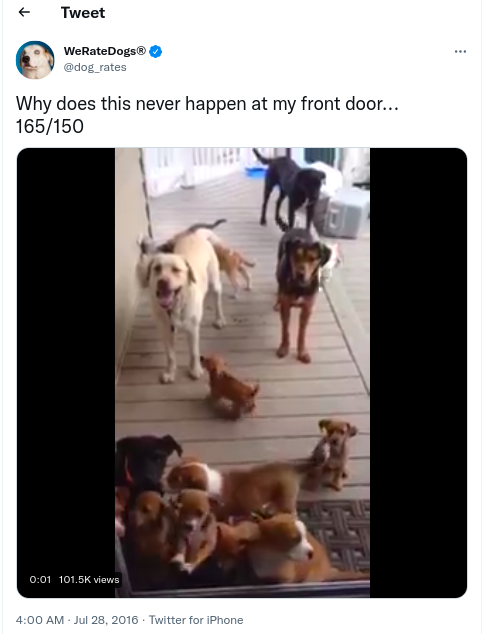

In [148]:
# As every observation in the data set is expected to be per one dog
# change values to a single dog rating by dividing over 15 to make the rating 11/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 758467244762497024').index, \
                      ['rating_numerator','rating_denominator']] = 11,10

In [149]:
#  tweet id: 758467244762497024 ##CHECK##

twitter_master_df.query('tweet_id == 758467244762497024')

tweet_id                  timestamp  \
902  758467244762497024  2016-07-28 01:00:57 +0000   

                                                                           tweet_source  \
902  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                         tweet_text  \
902  Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   

                                                       expanded_urls  \
902  https://twitter.com/dog_rates/status/758467244762497024/video/1   

     rating_numerator  rating_denominator dog_name  retweet_count  \
902                11                  10      NaN         2539.0   

     favorite_count        ...        first_image_prediction  \
902          5316.0        ...            Labrador_retriever   

    first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
902            0.436377                       True               Chihuahua   

    second_prediction_cs  second_prediction_is_a_dog  \
902             0.113956                        True   

             third_image_prediction third_prediction_cs  \
902  American_Staffordshire_terrier            0.099689   

     third_prediction_is_a_dog dogtionary_rating  
902                       True               NaN  

[1 rows x 21 columns]

In [150]:
#  tweet id: 749981277374128128

twitter_master_df.query('tweet_id == 749981277374128128')

tweet_id                  timestamp  \
979  749981277374128128  2016-07-04 15:00:45 +0000   

                                                                            tweet_source  \
979  <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>   

                                                                         tweet_text  \
979  This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   

                                                       expanded_urls  \
979  https://twitter.com/dog_rates/status/749981277374128128/photo/1   

     rating_numerator  rating_denominator dog_name  retweet_count  \
979              1776                  10  Atticus         2772.0   

     favorite_count        ...        first_image_prediction  \
979          5569.0        ...                       bow_tie   

    first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
979            0.533941                      False              sunglasses   

    second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
979             0.080822                       False               sunglass   

    third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
979            0.050776                      False               NaN  

[1 rows x 21 columns]

In [151]:
# this tweet has the max value and is an outlier to be dropped as it does not appear to be a reasonable rating

twitter_master_df.drop(twitter_master_df.query('tweet_id == "749981277374128128"').index, inplace=True)


In [152]:
#  tweet id: 749981277374128128 ##CHECK##

twitter_master_df.query('tweet_id == 749981277374128128')

Empty DataFrame
Columns: [tweet_id, timestamp, tweet_source, tweet_text, expanded_urls, rating_numerator, rating_denominator, dog_name, retweet_count, favorite_count, jpg_url, first_image_prediction, first_prediction_cs, first_prediction_is_a_dog, second_image_prediction, second_prediction_cs, second_prediction_is_a_dog, third_image_prediction, third_prediction_cs, third_prediction_is_a_dog, dogtionary_rating]
Index: []

[0 rows x 21 columns]

In [153]:
#  tweet id: 731156023742988288

twitter_master_df.query('tweet_id == 731156023742988288')

tweet_id                  timestamp  \
1120  731156023742988288  2016-05-13 16:15:54 +0000   

                                                                            tweet_source  \
1120  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                     tweet_text  \
1120  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   

                                                        expanded_urls  \
1120  https://twitter.com/dog_rates/status/731156023742988288/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1120               204                 170      NaN         1434.0   

      favorite_count        ...        first_image_prediction  \
1120          4196.0        ...                      lakeside   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1120            0.501767                      False              breakwater   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1120             0.051351                       False           king_penguin   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1120            0.049444                      False             doggo  

[1 rows x 21 columns]

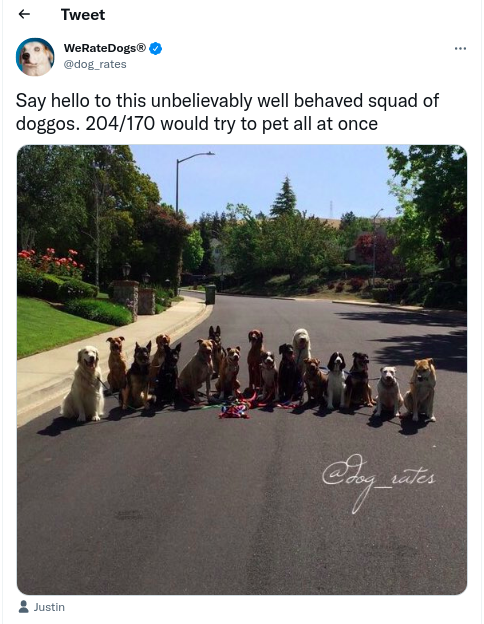

In [154]:
# As every observation in the data set is expected to be per one dog
# change values to a single dog rating by dividing over 17 to make the rating 12/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 731156023742988288').index, \
                      ['rating_numerator','rating_denominator']] = 12,10

In [155]:
#  tweet id: 731156023742988288 ##CHECK##

twitter_master_df.query('tweet_id == 731156023742988288')

tweet_id                  timestamp  \
1120  731156023742988288  2016-05-13 16:15:54 +0000   

                                                                            tweet_source  \
1120  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                     tweet_text  \
1120  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   

                                                        expanded_urls  \
1120  https://twitter.com/dog_rates/status/731156023742988288/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1120                12                  10      NaN         1434.0   

      favorite_count        ...        first_image_prediction  \
1120          4196.0        ...                      lakeside   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1120            0.501767                      False              breakwater   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1120             0.051351                       False           king_penguin   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1120            0.049444                      False             doggo  

[1 rows x 21 columns]

In [156]:
#  tweet id: 716439118184652801

twitter_master_df.query('tweet_id == 716439118184652801')

tweet_id                  timestamp  \
1202  716439118184652801  2016-04-03 01:36:11 +0000   

                                                                            tweet_source  \
1202  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                 tweet_text  \
1202  This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   

                                                        expanded_urls  \
1202  https://twitter.com/dog_rates/status/716439118184652801/photo/1   

      rating_numerator  rating_denominator  dog_name  retweet_count  \
1202                50                  50  Bluebert          247.0   

      favorite_count        ...        first_image_prediction  \
1202          2574.0        ...                Siberian_husky   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1202            0.396495                       True                malamute   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1202             0.317053                        True             Eskimo_dog   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1202            0.273419                       True               NaN  

[1 rows x 21 columns]

In [157]:
# Actual rating as per the tweet is 11/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 716439118184652801').index, \
                      ['rating_numerator','rating_denominator']] = 11,10

In [158]:
#  tweet id: 716439118184652801 ##CHECK##

twitter_master_df.query('tweet_id == 716439118184652801')

tweet_id                  timestamp  \
1202  716439118184652801  2016-04-03 01:36:11 +0000   

                                                                            tweet_source  \
1202  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                 tweet_text  \
1202  This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   

                                                        expanded_urls  \
1202  https://twitter.com/dog_rates/status/716439118184652801/photo/1   

      rating_numerator  rating_denominator  dog_name  retweet_count  \
1202                11                  10  Bluebert          247.0   

      favorite_count        ...        first_image_prediction  \
1202          2574.0        ...                Siberian_husky   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1202            0.396495                       True                malamute   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1202             0.317053                        True             Eskimo_dog   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1202            0.273419                       True               NaN  

[1 rows x 21 columns]

In [159]:
#  tweet id: 713900603437621249

twitter_master_df.query('tweet_id == 713900603437621249')

tweet_id                  timestamp  \
1228  713900603437621249  2016-03-27 01:29:02 +0000   

                                                                            tweet_source  \
1228  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                         tweet_text  \
1228  Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   

                                                        expanded_urls  \
1228  https://twitter.com/dog_rates/status/713900603437621249/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1228                99                  90      NaN          829.0   

      favorite_count        ...        first_image_prediction  \
1228          3062.0        ...              golden_retriever   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1228            0.371816                       True          cocker_spaniel   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1228             0.177413                        True           Irish_setter   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1228            0.092725                       True            pupper  

[1 rows x 21 columns]

In [160]:
#  group rating for 9 change the rating per dog to 11/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 713900603437621249').index, \
                      ['rating_numerator','rating_denominator']] = 11,10

In [161]:
#  tweet id: 713900603437621249 ##CHECK##

twitter_master_df.query('tweet_id == 713900603437621249')

tweet_id                  timestamp  \
1228  713900603437621249  2016-03-27 01:29:02 +0000   

                                                                            tweet_source  \
1228  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                         tweet_text  \
1228  Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   

                                                        expanded_urls  \
1228  https://twitter.com/dog_rates/status/713900603437621249/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1228                11                  10      NaN          829.0   

      favorite_count        ...        first_image_prediction  \
1228          3062.0        ...              golden_retriever   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1228            0.371816                       True          cocker_spaniel   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1228             0.177413                        True           Irish_setter   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1228            0.092725                       True            pupper  

[1 rows x 21 columns]

In [162]:
#  tweet id: 710658690886586372

twitter_master_df.query('tweet_id == 710658690886586372')

tweet_id                  timestamp  \
1254  710658690886586372  2016-03-18 02:46:49 +0000   

                                                                            tweet_source  \
1254  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                        tweet_text  \
1254  Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   

                                                        expanded_urls  \
1254  https://twitter.com/dog_rates/status/710658690886586372/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1254                80                  80      NaN          636.0   

      favorite_count        ...              first_image_prediction  \
1254          2529.0        ...         soft-coated_wheaten_terrier   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1254            0.948617                       True          Dandie_Dinmont   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1254             0.018664                        True                  cairn   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1254            0.015943                       True            pupper  

[1 rows x 21 columns]

In [163]:
#  group rating for 8 change the rating per dog to 10/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 710658690886586372').index, \
                      ['rating_numerator','rating_denominator']] = 10,10

In [164]:
#  tweet id: 710658690886586372 ##CHECK##

twitter_master_df.query('tweet_id == 710658690886586372')

tweet_id                  timestamp  \
1254  710658690886586372  2016-03-18 02:46:49 +0000   

                                                                            tweet_source  \
1254  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                        tweet_text  \
1254  Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   

                                                        expanded_urls  \
1254  https://twitter.com/dog_rates/status/710658690886586372/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1254                10                  10      NaN          636.0   

      favorite_count        ...              first_image_prediction  \
1254          2529.0        ...         soft-coated_wheaten_terrier   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1254            0.948617                       True          Dandie_Dinmont   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1254             0.018664                        True                  cairn   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1254            0.015943                       True            pupper  

[1 rows x 21 columns]

In [165]:
#  tweet id: 709198395643068416

twitter_master_df.query('tweet_id == 709198395643068416')

tweet_id                  timestamp  \
1274  709198395643068416  2016-03-14 02:04:08 +0000   

                                                                            tweet_source  \
1274  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                       tweet_text  \
1274  From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/...   

                                                        expanded_urls  \
1274  https://twitter.com/dog_rates/status/709198395643068416/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1274                45                  50      NaN          721.0   

      favorite_count        ...        first_image_prediction  \
1274          2634.0        ...                        borzoi   

     first_prediction_cs  first_prediction_is_a_dog  second_image_prediction  \
1274            0.490783                       True  wire-haired_fox_terrier   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1274             0.083513                        True         English_setter   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1274            0.083184                       True               NaN  

[1 rows x 21 columns]

In [166]:
# Group rating for 5 change the rating per dog to 9/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 709198395643068416').index, \
                      ['rating_numerator','rating_denominator']] = 9,10

In [167]:
#  tweet id: 710658690886586372 ##CHECK##

twitter_master_df.query('tweet_id == 709198395643068416')

tweet_id                  timestamp  \
1274  709198395643068416  2016-03-14 02:04:08 +0000   

                                                                            tweet_source  \
1274  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                       tweet_text  \
1274  From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/...   

                                                        expanded_urls  \
1274  https://twitter.com/dog_rates/status/709198395643068416/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1274                 9                  10      NaN          721.0   

      favorite_count        ...        first_image_prediction  \
1274          2634.0        ...                        borzoi   

     first_prediction_cs  first_prediction_is_a_dog  second_image_prediction  \
1274            0.490783                       True  wire-haired_fox_terrier   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1274             0.083513                        True         English_setter   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1274            0.083184                       True               NaN  

[1 rows x 21 columns]

In [168]:
#  tweet id: 704054845121142784

twitter_master_df.query('tweet_id == 704054845121142784')

tweet_id                  timestamp  \
1351  704054845121142784  2016-02-28 21:25:30 +0000   

                                                                            tweet_source  \
1351  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                              tweet_text  \
1351  Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   

                                                        expanded_urls  \
1351  https://twitter.com/dog_rates/status/704054845121142784/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1351                60                  50      NaN         1028.0   

      favorite_count        ...        first_image_prediction  \
1351          3201.0        ...                Great_Pyrenees   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1351            0.667939                       True                  kuvasz   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1351             0.228764                        True       golden_retriever   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1351            0.043885                       True            pupper  

[1 rows x 21 columns]

In [169]:
# Group rating for 5 change the rating per dog to 12/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 704054845121142784').index, \
                      ['rating_numerator','rating_denominator']] = 12,10

In [170]:
#  tweet id: 704054845121142784 ##CHECK##

twitter_master_df.query('tweet_id == 704054845121142784')

tweet_id                  timestamp  \
1351  704054845121142784  2016-02-28 21:25:30 +0000   

                                                                            tweet_source  \
1351  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                              tweet_text  \
1351  Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   

                                                        expanded_urls  \
1351  https://twitter.com/dog_rates/status/704054845121142784/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1351                12                  10      NaN         1028.0   

      favorite_count        ...        first_image_prediction  \
1351          3201.0        ...                Great_Pyrenees   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1351            0.667939                       True                  kuvasz   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1351             0.228764                        True       golden_retriever   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1351            0.043885                       True            pupper  

[1 rows x 21 columns]

In [171]:
#  tweet id: 697463031882764288

twitter_master_df.query('tweet_id == 697463031882764288')

tweet_id                  timestamp  \
1433  697463031882764288  2016-02-10 16:51:59 +0000   

                                                                            tweet_source  \
1433  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                        tweet_text  \
1433  Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   

                                                        expanded_urls  \
1433  https://twitter.com/dog_rates/status/697463031882764288/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1433                44                  40      NaN         1552.0   

      favorite_count        ...        first_image_prediction  \
1433          3748.0        ...            Labrador_retriever   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1433            0.999885                       True        golden_retriever   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1433             0.000098                        True                    pug   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1433            0.000008                       True               NaN  

[1 rows x 21 columns]

In [172]:
# Group rating for 4 change the rating per dog to 11/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 697463031882764288').index, \
                      ['rating_numerator','rating_denominator']] = 11,10

In [173]:
#  tweet id: 697463031882764288 ##CHECK##

twitter_master_df.query('tweet_id == 697463031882764288')

tweet_id                  timestamp  \
1433  697463031882764288  2016-02-10 16:51:59 +0000   

                                                                            tweet_source  \
1433  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                        tweet_text  \
1433  Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   

                                                        expanded_urls  \
1433  https://twitter.com/dog_rates/status/697463031882764288/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1433                11                  10      NaN         1552.0   

      favorite_count        ...        first_image_prediction  \
1433          3748.0        ...            Labrador_retriever   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1433            0.999885                       True        golden_retriever   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1433             0.000098                        True                    pug   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1433            0.000008                       True               NaN  

[1 rows x 21 columns]

In [174]:
#  tweet id: 684225744407494656

twitter_master_df.query('tweet_id == 684225744407494656')

tweet_id                  timestamp  \
1634  684225744407494656  2016-01-05 04:11:44 +0000   

                                                                            tweet_source  \
1634  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                          tweet_text  \
1634  Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3   

                                                                                                                        expanded_urls  \
1634  https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1634               143                 130      NaN          239.0   

      favorite_count        ...        first_image_prediction  \
1634          1369.0        ...              golden_retriever   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1634            0.203249                       True                 Samoyed   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1634             0.067958                        True         Great_Pyrenees   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1634            0.065327                       True            pupper  

[1 rows x 21 columns]

In [175]:
#  group rating for 13 change the rating per dog to 11/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 684225744407494656').index, \
                      ['rating_numerator','rating_denominator']] = 11,10

In [176]:
#  tweet id: 684225744407494656 ##CHECK##

twitter_master_df.query('tweet_id == 684225744407494656')

tweet_id                  timestamp  \
1634  684225744407494656  2016-01-05 04:11:44 +0000   

                                                                            tweet_source  \
1634  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                          tweet_text  \
1634  Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3   

                                                                                                                        expanded_urls  \
1634  https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1634                11                  10      NaN          239.0   

      favorite_count        ...        first_image_prediction  \
1634          1369.0        ...              golden_retriever   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1634            0.203249                       True                 Samoyed   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1634             0.067958                        True         Great_Pyrenees   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1634            0.065327                       True            pupper  

[1 rows x 21 columns]

In [177]:
#  tweet id: 684222868335505415

twitter_master_df.query('tweet_id == 684222868335505415')

tweet_id                  timestamp  \
1635  684222868335505415  2016-01-05 04:00:18 +0000   

                                                                            tweet_source  \
1635  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                       tweet_text  \
1635  Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJ...   

                                                        expanded_urls  \
1635  https://twitter.com/dog_rates/status/684222868335505415/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1635               121                 110      NaN         1563.0   

      favorite_count        ...              first_image_prediction  \
1635          4225.0        ...         soft-coated_wheaten_terrier   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1635            0.791182                       True          cocker_spaniel   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1635             0.072444                        True                  teddy   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1635            0.071486                      False            pupper  

[1 rows x 21 columns]

In [178]:
# Group rating for 11 change the rating per dog to 11/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 684222868335505415').index, \
                      ['rating_numerator','rating_denominator']] = 11,10

In [179]:
#  tweet id: 684222868335505415 ##CHECK##

twitter_master_df.query('tweet_id == 684222868335505415')

tweet_id                  timestamp  \
1635  684222868335505415  2016-01-05 04:00:18 +0000   

                                                                            tweet_source  \
1635  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                       tweet_text  \
1635  Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJ...   

                                                        expanded_urls  \
1635  https://twitter.com/dog_rates/status/684222868335505415/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1635                11                  10      NaN         1563.0   

      favorite_count        ...              first_image_prediction  \
1635          4225.0        ...         soft-coated_wheaten_terrier   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1635            0.791182                       True          cocker_spaniel   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1635             0.072444                        True                  teddy   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1635            0.071486                      False            pupper  

[1 rows x 21 columns]

In [180]:
#  tweet id: 682808988178739200

twitter_master_df.query('tweet_id == 682808988178739200')

tweet_id                  timestamp  \
1663  682808988178739200  2016-01-01 06:22:03 +0000   

                                                                            tweet_source  \
1663  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                       tweet_text  \
1663  I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible   

     expanded_urls  rating_numerator  rating_denominator dog_name  \
1663           NaN                20                  16      NaN   

      retweet_count  favorite_count        ...        first_image_prediction  \
1663          210.0          1953.0        ...                           NaN   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1663                 NaN                        NaN                     NaN   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1663                  NaN                         NaN                    NaN   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1663                 NaN                        NaN               NaN  

[1 rows x 21 columns]

Not a valid rating
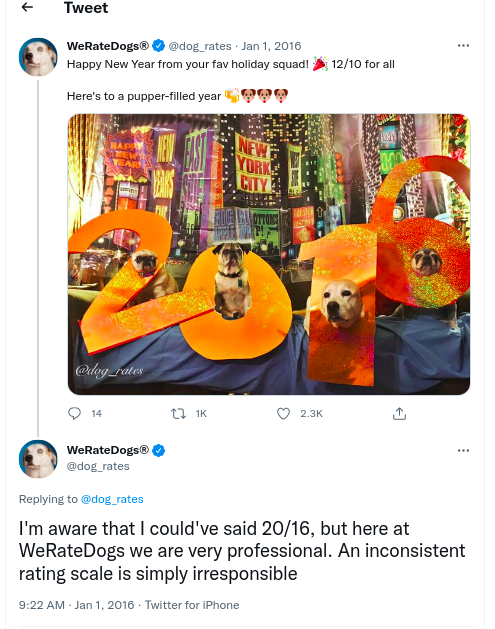

In [181]:
#  drop tweet as it is not a valid rating

twitter_master_df.drop(twitter_master_df.query('tweet_id == "682808988178739200"').index, inplace=True)

In [182]:
#  tweet id: 682808988178739200 ##CHECK##

twitter_master_df.query('tweet_id == 682808988178739200')

Empty DataFrame
Columns: [tweet_id, timestamp, tweet_source, tweet_text, expanded_urls, rating_numerator, rating_denominator, dog_name, retweet_count, favorite_count, jpg_url, first_image_prediction, first_prediction_cs, first_prediction_is_a_dog, second_image_prediction, second_prediction_cs, second_prediction_is_a_dog, third_image_prediction, third_prediction_cs, third_prediction_is_a_dog, dogtionary_rating]
Index: []

[0 rows x 21 columns]

In [183]:
#  tweet id: 680494726643068929

twitter_master_df.query('tweet_id == 680494726643068929')

tweet_id                  timestamp  \
1712  680494726643068929  2015-12-25 21:06:00 +0000   

                                                                            tweet_source  \
1712  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                      tweet_text  \
1712  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

                                                        expanded_urls  \
1712  https://twitter.com/dog_rates/status/680494726643068929/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1712                26                  10      NaN          542.0   

      favorite_count        ...        first_image_prediction  \
1712          1879.0        ...                        kuvasz   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1712            0.438627                       True                 Samoyed   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1712             0.111622                        True         Great_Pyrenees   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1712            0.064061                       True            pupper  

[1 rows x 21 columns]

In [184]:
# fix rating numerator to 11 as all ratings are integers round down 11.26 to be inline with the dataframe ratings
# as per tweet text

twitter_master_df.loc[twitter_master_df.query('tweet_id == 680494726643068929').index,['rating_numerator']] = 11

In [185]:
#  tweet id: 680494726643068929 ##CHECK##

twitter_master_df.query('tweet_id == 680494726643068929')

tweet_id                  timestamp  \
1712  680494726643068929  2015-12-25 21:06:00 +0000   

                                                                            tweet_source  \
1712  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                      tweet_text  \
1712  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

                                                        expanded_urls  \
1712  https://twitter.com/dog_rates/status/680494726643068929/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1712                11                  10      NaN          542.0   

      favorite_count        ...        first_image_prediction  \
1712          1879.0        ...                        kuvasz   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1712            0.438627                       True                 Samoyed   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1712             0.111622                        True         Great_Pyrenees   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1712            0.064061                       True            pupper  

[1 rows x 21 columns]

In [186]:
#  tweet id: 677716515794329600

twitter_master_df.query('tweet_id == 677716515794329600')

tweet_id                  timestamp  \
1779  677716515794329600  2015-12-18 05:06:23 +0000   

                                                                            tweet_source  \
1779  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                  tweet_text  \
1779  IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   

                                                        expanded_urls  \
1779  https://twitter.com/dog_rates/status/677716515794329600/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1779               144                 120      NaN         1104.0   

      favorite_count        ...        first_image_prediction  \
1779          3323.0        ...                         teddy   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1779            0.662908                      False                    crib   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1779             0.031891                       False                   chow   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1779            0.025438                       True               NaN  

[1 rows x 21 columns]

In [187]:
# Group rating for 12 change the rating per dog to 12/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 677716515794329600').index, \
                      ['rating_numerator','rating_denominator']] = 12,10

In [188]:
#  tweet id: 680494726643068929 ##CHECK##

twitter_master_df.query('tweet_id == 677716515794329600')

tweet_id                  timestamp  \
1779  677716515794329600  2015-12-18 05:06:23 +0000   

                                                                            tweet_source  \
1779  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                  tweet_text  \
1779  IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   

                                                        expanded_urls  \
1779  https://twitter.com/dog_rates/status/677716515794329600/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1779                12                  10      NaN         1104.0   

      favorite_count        ...        first_image_prediction  \
1779          3323.0        ...                         teddy   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1779            0.662908                      False                    crib   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1779             0.031891                       False                   chow   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1779            0.025438                       True               NaN  

[1 rows x 21 columns]

In [189]:
#  tweet id: 675853064436391936

twitter_master_df.query('tweet_id == 675853064436391936')

tweet_id                  timestamp  \
1843  675853064436391936  2015-12-13 01:41:41 +0000   

                                                                            tweet_source  \
1843  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                       tweet_text  \
1843  Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   

                                                                                                                        expanded_urls  \
1843  https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1843                88                  80      NaN         1460.0   

      favorite_count        ...        first_image_prediction  \
1843          2927.0        ...            Labrador_retriever   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1843            0.868367                       True        golden_retriever   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1843             0.043305                        True                 vizsla   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1843            0.028207                       True            pupper  

[1 rows x 21 columns]

In [190]:
# Group rating for 8 change the rating per dog to 12/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 675853064436391936').index, \
                      ['rating_numerator','rating_denominator']] = 11,10

In [191]:
#  tweet id: 675853064436391936 ##CHECK##

twitter_master_df.query('tweet_id == 675853064436391936')

tweet_id                  timestamp  \
1843  675853064436391936  2015-12-13 01:41:41 +0000   

                                                                            tweet_source  \
1843  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                       tweet_text  \
1843  Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   

                                                                                                                        expanded_urls  \
1843  https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1843                11                  10      NaN         1460.0   

      favorite_count        ...        first_image_prediction  \
1843          2927.0        ...            Labrador_retriever   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1843            0.868367                       True        golden_retriever   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1843             0.043305                        True                 vizsla   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1843            0.028207                       True            pupper  

[1 rows x 21 columns]

In [192]:
#  tweet id: 670842764863651840

twitter_master_df.query('tweet_id == 670842764863651840')

tweet_id                  timestamp  \
2074  670842764863651840  2015-11-29 05:52:33 +0000   

                                                                            tweet_source  \
2074  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                               tweet_text  \
2074  After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY   

                                                        expanded_urls  \
2074  https://twitter.com/dog_rates/status/670842764863651840/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
2074               420                  10      NaN         4324.0   

      favorite_count        ...        first_image_prediction  \
2074          7989.0        ...                    microphone   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
2074            0.096063                      False               accordion   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
2074             0.094075                       False              drumstick   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
2074            0.061113                      False               NaN  

[1 rows x 21 columns]

Rating for Snoop Dogg .. not an actual dog
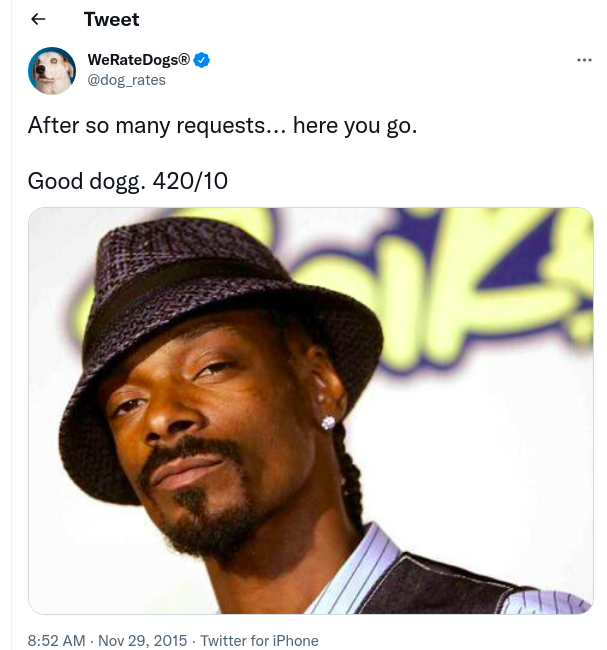

In [193]:
#  drop row

twitter_master_df.drop(twitter_master_df.query('tweet_id == 670842764863651840').index, inplace=True)

In [194]:
#  tweet id: 670842764863651840 ##CHECK##

twitter_master_df.query('tweet_id == 670842764863651840')

Empty DataFrame
Columns: [tweet_id, timestamp, tweet_source, tweet_text, expanded_urls, rating_numerator, rating_denominator, dog_name, retweet_count, favorite_count, jpg_url, first_image_prediction, first_prediction_cs, first_prediction_is_a_dog, second_image_prediction, second_prediction_cs, second_prediction_is_a_dog, third_image_prediction, third_prediction_cs, third_prediction_is_a_dog, dogtionary_rating]
Index: []

[0 rows x 21 columns]

In [195]:
#  tweet id: 820690176645140481

twitter_master_df.query('tweet_id == 820690176645140481')

tweet_id                  timestamp  \
433  820690176645140481  2017-01-15 17:52:40 +0000   

                                                                           tweet_source  \
433  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                              tweet_text  \
433  The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   

                                                                                                                                   expanded_urls  \
433  https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://...   

     rating_numerator  rating_denominator dog_name  retweet_count  \
433                84                  70      NaN         3716.0   

     favorite_count        ...              first_image_prediction  \
433         13518.0        ...         West_Highland_white_terrier   

    first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
433            0.872064                       True                  kuvasz   

    second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
433             0.059526                        True                Samoyed   

    third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
433              0.0374                       True               NaN  

[1 rows x 21 columns]

In [196]:
# group rating for 7 change the rating per dog to 12/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 820690176645140481').index, \
                      ['rating_numerator','rating_denominator']] = 12,10

In [197]:
#  tweet id: 670842764863651840 ##CHECK##
twitter_master_df.query('tweet_id == 820690176645140481')

tweet_id                  timestamp  \
433  820690176645140481  2017-01-15 17:52:40 +0000   

                                                                           tweet_source  \
433  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                              tweet_text  \
433  The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   

                                                                                                                                   expanded_urls  \
433  https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://...   

     rating_numerator  rating_denominator dog_name  retweet_count  \
433                12                  10      NaN         3716.0   

     favorite_count        ...              first_image_prediction  \
433         13518.0        ...         West_Highland_white_terrier   

    first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
433            0.872064                       True                  kuvasz   

    second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
433             0.059526                        True                Samoyed   

    third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
433              0.0374                       True               NaN  

[1 rows x 21 columns]

In [198]:
# check values less than 5 --> ratings look ok when compared to the tweet text

twitter_master_df.query('rating_numerator < 5')

tweet_id                  timestamp  \
315   835152434251116546  2017-02-24 15:40:31 +0000   
765   777885040357281792  2016-09-19 15:00:20 +0000   
883   760252756032651264  2016-08-01 23:15:56 +0000   
912   757596066325864448  2016-07-25 15:19:12 +0000   
1004  747816857231626240  2016-06-28 15:40:07 +0000   
1016  746906459439529985  2016-06-26 03:22:31 +0000   
1165  722974582966214656  2016-04-21 02:25:47 +0000   
1189  718246886998687744  2016-04-08 01:19:36 +0000   
1219  714631576617938945  2016-03-29 01:53:39 +0000   
1249  711306686208872448  2016-03-19 21:41:44 +0000   
1303  707420581654872064  2016-03-09 04:19:44 +0000   
1314  706901761596989440  2016-03-07 17:58:08 +0000   
1406  699088579889332224  2016-02-15 04:31:20 +0000   
1446  696490539101908992  2016-02-08 00:27:39 +0000   
1459  695064344191721472  2016-02-04 02:00:27 +0000   
1478  693590843962331137  2016-01-31 00:25:18 +0000   
1598  686035780142297088  2016-01-10 04:04:10 +0000   
1601  686003207160610816  2016-01-10 01:54:44 +0000   
1629  684567543613382656  2016-01-06 02:49:55 +0000   
1692  681302363064414209  2015-12-28 02:35:15 +0000   
1701  680940246314430465  2015-12-27 02:36:20 +0000   
1761  678675843183484930  2015-12-20 20:38:24 +0000   
1764  678424312106393600  2015-12-20 03:58:55 +0000   
1836  676098748976615425  2015-12-13 17:57:57 +0000   
1869  675153376133427200  2015-12-11 03:21:23 +0000   
1898  674690135443775488  2015-12-09 20:40:38 +0000   
1920  674265582246694913  2015-12-08 16:33:36 +0000   
1928  674045139690631169  2015-12-08 01:57:39 +0000   
1940  673716320723169284  2015-12-07 04:11:02 +0000   
1941  673715861853720576  2015-12-07 04:09:13 +0000   
1947  673700254269775872  2015-12-07 03:07:12 +0000   
2038  671550332464455680  2015-12-01 04:44:10 +0000   
2070  671122204919246848  2015-11-30 00:22:57 +0000   
2076  670838202509447168  2015-11-29 05:34:25 +0000   
2079  670826280409919488  2015-11-29 04:47:03 +0000   
2091  670783437142401025  2015-11-29 01:56:48 +0000   
2136  670055038660800512  2015-11-27 01:42:24 +0000   
2183  668989615043424256  2015-11-24 03:08:48 +0000   
2186  668981893510119424  2015-11-24 02:38:07 +0000   
2202  668643542311546881  2015-11-23 04:13:37 +0000   
2222  668466899341221888  2015-11-22 16:31:42 +0000   
2237  668142349051129856  2015-11-21 19:02:04 +0000   
2239  667937095915278337  2015-11-21 05:26:27 +0000   
2246  667878741721415682  2015-11-21 01:34:35 +0000   
2261  667549055577362432  2015-11-20 03:44:31 +0000   
2288  667176164155375616  2015-11-19 03:02:47 +0000   
2305  666837028449972224  2015-11-18 04:35:11 +0000   
2310  666786068205871104  2015-11-18 01:12:41 +0000   
2316  666649482315059201  2015-11-17 16:09:56 +0000   
2326  666411507551481857  2015-11-17 00:24:19 +0000   
2334  666293911632134144  2015-11-16 16:37:02 +0000   
2335  666287406224695296  2015-11-16 16:11:11 +0000   
2338  666104133288665088  2015-11-16 04:02:55 +0000   
2349  666051853826850816  2015-11-16 00:35:11 +0000   

                                                                            tweet_source  \
315   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
765   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
883   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
912   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1004  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1016  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1165  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1189  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1219  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1249  <a href="http://twitter.com/download/iphone" rel="nofollow">Twit

In [199]:
#  check denominator odd values

twitter_master_df.rating_denominator.value_counts()

10    2140
11       2
20       2
15       1
2        1
Name: rating_denominator, dtype: int64

In [200]:
#  display 6 values greater than 10 to check 

twitter_master_df.query('rating_denominator > 10')

tweet_id                  timestamp  \
342   832088576586297345  2017-02-16 04:45:50 +0000   
1068  740373189193256964  2016-06-08 02:41:38 +0000   
1165  722974582966214656  2016-04-21 02:25:47 +0000   
1598  686035780142297088  2016-01-10 04:04:10 +0000   
1662  682962037429899265  2016-01-01 16:30:13 +0000   

                                                                            tweet_source  \
342   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1068  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1165  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1598  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1662  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                       tweet_text  \
342                                                                                                      @docmisterio account started on 11/15/15   
1068  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDND...   
1165                                                                             Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1598     Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating   
1662  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   

                                                                                                                                    expanded_urls  \
342                                                                                                                                           NaN   
1068  https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://...   
1165                                                                              https://twitter.com/dog_rates/status/722974582966214656/photo/1   
1598                                                                                                                                          NaN   
1662                                                                              https://twitter.com/dog_rates/status/682962037429899265/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
342                 11                  15      NaN            3.0   
1068                 9                  11      NaN         9220.0   
1165                 4                  20      NaN         1764.0   
1598                 4                  20      NaN          138.0   
1662                 7                  11   Darrel        15043.0   

      favorite_count        ...        first_image_prediction  \
342             72.0        ...                           NaN   
1068         20648.0        ...              golden_retriever   
1165          4493.0        ...                    Great_Dane   
1598          1274.0        ...                           NaN   
1662         26239.0        ...                         dingo   

     first_prediction_cs  first_prediction_is_a_dog  \
342                  NaN                        NaN   
1068            0.807644                       True   
1165            0.246762                       True   
1598                 NaN                        NaN   
1662            0.278600                      False   

         second_image_prediction second_prediction_cs  \
342                          NaN                  NaN   
1068                      kuvasz             0.101286   
1165  Greater_Swiss_Mountain

In [201]:
#  tweet id: 832088576586297345

twitter_master_df.query('tweet_id == 832088576586297345')

tweet_id                  timestamp  \
342  832088576586297345  2017-02-16 04:45:50 +0000   

                                                                           tweet_source  \
342  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                   tweet_text expanded_urls  rating_numerator  \
342  @docmisterio account started on 11/15/15           NaN                11   

     rating_denominator dog_name  retweet_count  favorite_count  \
342                  15      NaN            3.0            72.0   

           ...        first_image_prediction first_prediction_cs  \
342        ...                           NaN                 NaN   

     first_prediction_is_a_dog second_image_prediction second_prediction_cs  \
342                        NaN                     NaN                  NaN   

     second_prediction_is_a_dog third_image_prediction third_prediction_cs  \
342                         NaN                    NaN                 NaN   

     third_prediction_is_a_dog dogtionary_rating  
342                        NaN               NaN  

[1 rows x 21 columns]

Not a dog related tweet
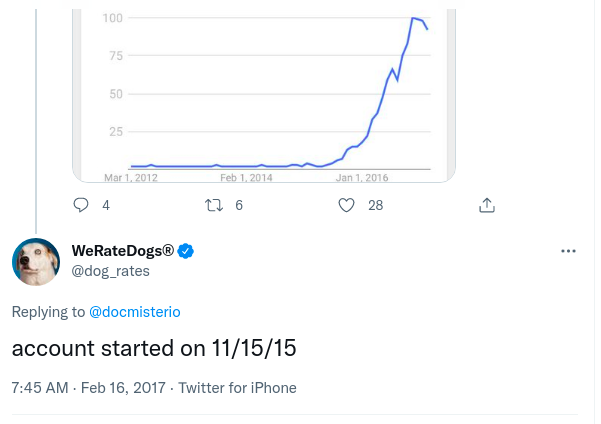

In [202]:
#  drop row

twitter_master_df.drop(twitter_master_df.query('tweet_id == 832088576586297345').index, inplace=True)

In [203]:
#  tweet id: 670842764863651840 ##CHECK##

twitter_master_df.query('tweet_id == 832088576586297345')

Empty DataFrame
Columns: [tweet_id, timestamp, tweet_source, tweet_text, expanded_urls, rating_numerator, rating_denominator, dog_name, retweet_count, favorite_count, jpg_url, first_image_prediction, first_prediction_cs, first_prediction_is_a_dog, second_image_prediction, second_prediction_cs, second_prediction_is_a_dog, third_image_prediction, third_prediction_cs, third_prediction_is_a_dog, dogtionary_rating]
Index: []

[0 rows x 21 columns]

In [204]:
#  tweet id: 740373189193256964

twitter_master_df.query('tweet_id == 740373189193256964')


tweet_id                  timestamp  \
1068  740373189193256964  2016-06-08 02:41:38 +0000   

                                                                            tweet_source  \
1068  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                       tweet_text  \
1068  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDND...   

                                                                                                                                    expanded_urls  \
1068  https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://...   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1068                 9                  11      NaN         9220.0   

      favorite_count        ...        first_image_prediction  \
1068         20648.0        ...              golden_retriever   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1068            0.807644                       True                  kuvasz   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1068             0.101286                        True     Labrador_retriever   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1068            0.023785                       True               NaN  

[1 rows x 21 columns]

In [205]:
#  wrong rating when compared to tweet text --> update to correct rating 14/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 740373189193256964').index, \
                      ['rating_numerator','rating_denominator']] = 14,10

In [206]:
#  tweet id: 670842764863651840 ##CHECK##

twitter_master_df.query('tweet_id == 740373189193256964')

tweet_id                  timestamp  \
1068  740373189193256964  2016-06-08 02:41:38 +0000   

                                                                            tweet_source  \
1068  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                       tweet_text  \
1068  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDND...   

                                                                                                                                    expanded_urls  \
1068  https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://...   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1068                14                  10      NaN         9220.0   

      favorite_count        ...        first_image_prediction  \
1068         20648.0        ...              golden_retriever   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1068            0.807644                       True                  kuvasz   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1068             0.101286                        True     Labrador_retriever   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1068            0.023785                       True               NaN  

[1 rows x 21 columns]

In [207]:
#  tweet id: 722974582966214656

twitter_master_df.query('tweet_id == 722974582966214656')

tweet_id                  timestamp  \
1165  722974582966214656  2016-04-21 02:25:47 +0000   

                                                                            tweet_source  \
1165  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                            tweet_text  \
1165  Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   

                                                        expanded_urls  \
1165  https://twitter.com/dog_rates/status/722974582966214656/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1165                 4                  20      NaN         1764.0   

      favorite_count        ...        first_image_prediction  \
1165          4493.0        ...                    Great_Dane   

     first_prediction_cs  first_prediction_is_a_dog  \
1165            0.246762                       True   

         second_image_prediction second_prediction_cs  \
1165  Greater_Swiss_Mountain_dog             0.126131   

      second_prediction_is_a_dog third_image_prediction third_prediction_cs  \
1165                        True             Weimaraner            0.085297   

      third_prediction_is_a_dog dogtionary_rating  
1165                       True               NaN  

[1 rows x 21 columns]

In [208]:
#  wrong rating when compared to tweet text --> update to correct rating 13/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 722974582966214656').index, \
                      ['rating_numerator','rating_denominator']] = 13,10

In [209]:
#  tweet id: 722974582966214656 ##CHECK##

twitter_master_df.query('tweet_id == 722974582966214656')

tweet_id                  timestamp  \
1165  722974582966214656  2016-04-21 02:25:47 +0000   

                                                                            tweet_source  \
1165  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                            tweet_text  \
1165  Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   

                                                        expanded_urls  \
1165  https://twitter.com/dog_rates/status/722974582966214656/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1165                13                  10      NaN         1764.0   

      favorite_count        ...        first_image_prediction  \
1165          4493.0        ...                    Great_Dane   

     first_prediction_cs  first_prediction_is_a_dog  \
1165            0.246762                       True   

         second_image_prediction second_prediction_cs  \
1165  Greater_Swiss_Mountain_dog             0.126131   

      second_prediction_is_a_dog third_image_prediction third_prediction_cs  \
1165                        True             Weimaraner            0.085297   

      third_prediction_is_a_dog dogtionary_rating  
1165                       True               NaN  

[1 rows x 21 columns]

In [210]:
#  tweet id: 686035780142297088

twitter_master_df.query('tweet_id == 686035780142297088')

tweet_id                  timestamp  \
1598  686035780142297088  2016-01-10 04:04:10 +0000   

                                                                            tweet_source  \
1598  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                    tweet_text  \
1598  Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating   

     expanded_urls  rating_numerator  rating_denominator dog_name  \
1598           NaN                 4                  20      NaN   

      retweet_count  favorite_count        ...        first_image_prediction  \
1598          138.0          1274.0        ...                           NaN   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1598                 NaN                        NaN                     NaN   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1598                  NaN                         NaN                    NaN   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1598                 NaN                        NaN               NaN  

[1 rows x 21 columns]

reply to the previous tweet
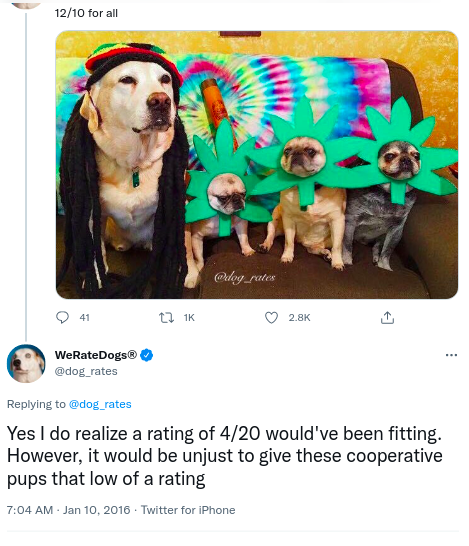

In [211]:
#  drop row

twitter_master_df.drop(twitter_master_df.query('tweet_id == 686035780142297088').index, inplace=True)

In [212]:
#  tweet id: 722974582966214656 ##CHECK##

twitter_master_df.query('tweet_id == 686035780142297088')

Empty DataFrame
Columns: [tweet_id, timestamp, tweet_source, tweet_text, expanded_urls, rating_numerator, rating_denominator, dog_name, retweet_count, favorite_count, jpg_url, first_image_prediction, first_prediction_cs, first_prediction_is_a_dog, second_image_prediction, second_prediction_cs, second_prediction_is_a_dog, third_image_prediction, third_prediction_cs, third_prediction_is_a_dog, dogtionary_rating]
Index: []

[0 rows x 21 columns]

In [213]:
#  tweet id: 682962037429899265

twitter_master_df.query('tweet_id == 682962037429899265')

tweet_id                  timestamp  \
1662  682962037429899265  2016-01-01 16:30:13 +0000   

                                                                            tweet_source  \
1662  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                       tweet_text  \
1662  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   

                                                        expanded_urls  \
1662  https://twitter.com/dog_rates/status/682962037429899265/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1662                 7                  11   Darrel        15043.0   

      favorite_count        ...        first_image_prediction  \
1662         26239.0        ...                         dingo   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1662              0.2786                      False               Chihuahua   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1662             0.155207                        True                  loupe   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1662            0.153598                      False               NaN  

[1 rows x 21 columns]

In [214]:
#  wrong rating when compared to tweet text --> update to correct rating 10/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 682962037429899265').index, \
                      ['rating_numerator','rating_denominator']] = 10,10

In [215]:
#  tweet id: 722974582966214656 ##CHECK##

twitter_master_df.query('tweet_id == 682962037429899265')

tweet_id                  timestamp  \
1662  682962037429899265  2016-01-01 16:30:13 +0000   

                                                                            tweet_source  \
1662  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                       tweet_text  \
1662  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   

                                                        expanded_urls  \
1662  https://twitter.com/dog_rates/status/682962037429899265/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
1662                10                  10   Darrel        15043.0   

      favorite_count        ...        first_image_prediction  \
1662         26239.0        ...                         dingo   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
1662              0.2786                      False               Chihuahua   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
1662             0.155207                        True                  loupe   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
1662            0.153598                      False               NaN  

[1 rows x 21 columns]

In [216]:
#  check the 2 value

twitter_master_df.query('rating_denominator == 2')

tweet_id                  timestamp  \
2335  666287406224695296  2015-11-16 16:11:11 +0000   

                                                                            tweet_source  \
2335  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                    tweet_text  \
2335  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   

                                                        expanded_urls  \
2335  https://twitter.com/dog_rates/status/666287406224695296/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
2335                 1                   2      NaN           71.0   

      favorite_count        ...        first_image_prediction  \
2335           152.0        ...                   Maltese_dog   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
2335            0.857531                       True              toy_poodle   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
2335             0.063064                        True       miniature_poodle   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
2335            0.025581                       True               NaN  

[1 rows x 21 columns]

In [217]:
#  wrong rating when compared to tweet text --> update to correct rating 9/10

twitter_master_df.loc[twitter_master_df.query('tweet_id == 666287406224695296').index, \
                      ['rating_numerator','rating_denominator']] = 9,10

In [218]:
#  tweet id: 666287406224695296 ##CHECK##

twitter_master_df.query('tweet_id == 666287406224695296')

tweet_id                  timestamp  \
2335  666287406224695296  2015-11-16 16:11:11 +0000   

                                                                            tweet_source  \
2335  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                    tweet_text  \
2335  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   

                                                        expanded_urls  \
2335  https://twitter.com/dog_rates/status/666287406224695296/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
2335                 9                  10      NaN           71.0   

      favorite_count        ...        first_image_prediction  \
2335           152.0        ...                   Maltese_dog   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
2335            0.857531                       True              toy_poodle   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
2335             0.063064                        True       miniature_poodle   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
2335            0.025581                       True               NaN  

[1 rows x 21 columns]

#### Test

In [219]:
#  check rating_numerator odd values

twitter_master_df.rating_numerator.value_counts()

12    496
10    444
11    431
13    307
9     155
8      98
7      53
14     43
5      34
6      32
3      18
4      15
2       9
1       7
0       2
Name: rating_numerator, dtype: int64

In [220]:
#  check rating_denominator odd values

twitter_master_df.rating_denominator.value_counts()

10    2144
Name: rating_denominator, dtype: int64

<a id='quality10'></a>
### Quality Issue #10: Strange predictions in P1, P2, P3 like: cliff , spatula, barrow, minibus, etc. to be assessed
<p style="text-align:right;"><a href="#quality"><span>&#171;</span>  back to list</a></p>

#### Define

check the data sanity for predicted images and identify any false positives or true negatives, adjust values as per findings

#### Code

In [221]:
#  change all values in the columns to low caps for consistancy

twitter_master_df['first_image_prediction'] = twitter_master_df['first_image_prediction'].str.lower()
twitter_master_df['second_image_prediction'] = twitter_master_df['second_image_prediction'].str.lower()
twitter_master_df['third_image_prediction'] = twitter_master_df['third_image_prediction'].str.lower()


In [222]:
#  compile false predictions check list

false_predictions = twitter_master_df.query('first_prediction_is_a_dog == False')['first_image_prediction'].unique()
false_predictions = np.append(false_predictions,(twitter_master_df.query('second_prediction_is_a_dog == False')['second_image_prediction'].unique()))
false_predictions = np.append(false_predictions,(twitter_master_df.query('third_prediction_is_a_dog == False')['third_image_prediction'].unique()))

# drop duplicates to create a unique false list

false_unique = np.unique(false_predictions)

In [223]:
#  compile true predictions check list

true_predictions = twitter_master_df.query('first_prediction_is_a_dog == True')['first_image_prediction'].unique()
true_predictions = np.append(true_predictions,(twitter_master_df.query('second_prediction_is_a_dog == True')['second_image_prediction'].unique()))
true_predictions = np.append(true_predictions,(twitter_master_df.query('third_prediction_is_a_dog == True')['third_image_prediction'].unique()))

# drop duplicates to create a unique true list

true_unique = np.unique(true_predictions)

In [224]:
#  compare true and false arrays and identify false positives or true negatives

compare_false_true = np.in1d(false_unique,true_unique)
compare_false_true.sum()

1

In [225]:
#  locate index of value appearing in true and false

np.where(compare_false_true)

(array([85]),)

In [226]:
# locate value at index 85 

false_unique[85]

'cardigan'

In [227]:
twitter_master_df.query('first_image_prediction == "cardigan" and first_prediction_is_a_dog == False ')

Empty DataFrame
Columns: [tweet_id, timestamp, tweet_source, tweet_text, expanded_urls, rating_numerator, rating_denominator, dog_name, retweet_count, favorite_count, jpg_url, first_image_prediction, first_prediction_cs, first_prediction_is_a_dog, second_image_prediction, second_prediction_cs, second_prediction_is_a_dog, third_image_prediction, third_prediction_cs, third_prediction_is_a_dog, dogtionary_rating]
Index: []

[0 rows x 21 columns]

In [228]:
twitter_master_df.query('second_image_prediction == "cardigan" and second_prediction_is_a_dog == False ')

tweet_id                  timestamp  \
2118  670420569653809152  2015-11-28 01:54:54 +0000   

                                                                            tweet_source  \
2118  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                    tweet_text  \
2118  This is Damon. The newest presidential candidate for 2016. 10/10 he gets my vote https://t.co/Z5nqlfjYJi   

                                                        expanded_urls  \
2118  https://twitter.com/dog_rates/status/670420569653809152/photo/1   

      rating_numerator  rating_denominator dog_name  retweet_count  \
2118                10                  10    Damon          342.0   

      favorite_count        ...        first_image_prediction  \
2118           668.0        ...                       bow_tie   

     first_prediction_cs  first_prediction_is_a_dog second_image_prediction  \
2118            0.268759                      False                cardigan   

     second_prediction_cs  second_prediction_is_a_dog third_image_prediction  \
2118             0.153957                       False                    wig   

     third_prediction_cs  third_prediction_is_a_dog dogtionary_rating  
2118            0.072295                      False               NaN  

[1 rows x 21 columns]

It appears that the algorithm identified everything but the dog breed, and it appears that the algorithm has some shared tags for dog breeds and items like cardigan for a sweater and cardigan for the cardigan corgi dog breed
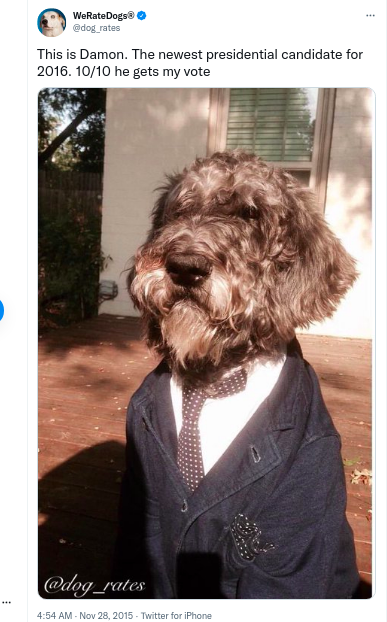

In [229]:
twitter_master_df.query('third_image_prediction == "cardigan" and third_prediction_is_a_dog == False ')

Empty DataFrame
Columns: [tweet_id, timestamp, tweet_source, tweet_text, expanded_urls, rating_numerator, rating_denominator, dog_name, retweet_count, favorite_count, jpg_url, first_image_prediction, first_prediction_cs, first_prediction_is_a_dog, second_image_prediction, second_prediction_cs, second_prediction_is_a_dog, third_image_prediction, third_prediction_cs, third_prediction_is_a_dog, dogtionary_rating]
Index: []

[0 rows x 21 columns]

<a id='quality11'></a>
### Quality Issue #11: timestamp field is a string
<p style="text-align:right;"><a href="#quality"><span>&#171;</span>  back to list</a></p>

#### Define

convert the datatype for the timestamp to datetime instead of a string to allow manipulation and calculations

#### Code

In [230]:
# recast field to date time data type

twitter_master_df['timestamp']  = pd.to_datetime(twitter_master_df['timestamp'])


In [231]:
# check timestamp

twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2144 non-null int64
timestamp                     2144 non-null datetime64[ns]
tweet_source                  2144 non-null object
tweet_text                    2144 non-null object
expanded_urls                 2093 non-null object
rating_numerator              2144 non-null int64
rating_denominator            2144 non-null int64
dog_name                      1389 non-null object
retweet_count                 2144 non-null float64
favorite_count                2144 non-null float64
jpg_url                       1970 non-null object
first_image_prediction        1970 non-null object
first_prediction_cs           1970 non-null float64
first_prediction_is_a_dog     1970 non-null object
second_image_prediction       1970 non-null object
second_prediction_cs          1970 non-null float64
second_prediction_is_a_dog    1970 non-null object
third_image_predi

<a id='quality12'></a>
### Quality Issue #12: tweet source is a hyperlink - reformat to source

#### Define

Strip hyperlink from tweet source field and update with the stripped mode of tweeting

#### Code

In [232]:
# 4 sources identified update tweet source accordingly

twitter_master_df['tweet_source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' \
                                         ,'iPhone', inplace = True)
twitter_master_df['tweet_source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' \
                                         ,'vine', inplace = True)
twitter_master_df['tweet_source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' \
                                         ,'web', inplace = True)
twitter_master_df['tweet_source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' \
                                         ,'tweetdeck', inplace = True)

#### Test

In [233]:
twitter_master_df['tweet_source'].value_counts()

iPhone       2012
vine           91
web            31
tweetdeck      10
Name: tweet_source, dtype: int64

In [234]:
twitter_master_df.sample()

tweet_id           timestamp tweet_source  \
1409  699060279947165696 2016-02-15 02:38:53         vine   

                                                                      tweet_text  \
1409  This is Yukon. He pukes rainbows. 12/10 magical af https://t.co/n6wND1v7il   

                      expanded_urls  rating_numerator  rating_denominator  \
1409  https://vine.co/v/inlmMHxtqDD                12                  10   

     dog_name  retweet_count  favorite_count        ...         \
1409    Yukon         2059.0          4173.0        ...          

     first_image_prediction first_prediction_cs  first_prediction_is_a_dog  \
1409                    NaN                 NaN                        NaN   

     second_image_prediction second_prediction_cs  second_prediction_is_a_dog  \
1409                     NaN                  NaN                         NaN   

     third_image_prediction third_prediction_cs  third_prediction_is_a_dog  \
1409                    NaN                 NaN                        NaN   

     dogtionary_rating  
1409               NaN  

[1 rows x 21 columns]

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [235]:
twitter_master_df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [236]:
# read saved file post wrangling
twitter_df = pd.read_csv('twitter_archive_master.csv')

In [237]:
# most favorite mode to tweet
twitter_df['tweet_source'].describe()

count       2144
unique         4
top       iPhone
freq        2012
Name: tweet_source, dtype: object

In [238]:
# calculate iPhone usage statistics
twitter_df['tweet_source'].value_counts()['iPhone'] / len(twitter_df)

0.93843283582089554

In [239]:
#  most favorite time to tweet
# create 'tweet_time_stamp' for analysis as csv imported timestamp column as a string

twitter_df['tweet_time_stamp'] = pd.to_datetime(twitter_df['timestamp'])


In [240]:
#  split columns for analysis

twitter_df['tweet_month'] = pd.DatetimeIndex(twitter_df['tweet_time_stamp']).month
twitter_df['tweet_day'] = pd.DatetimeIndex(twitter_df['tweet_time_stamp']).day
twitter_df['tweet_hour'] = pd.DatetimeIndex(twitter_df['tweet_time_stamp']).hour

In [241]:
#  check percentages by month

twitter_df['tweet_month'].value_counts(normalize=True)

12    0.206623
11    0.166511
1     0.121269
2     0.090951
3     0.088619
7     0.068097
6     0.065299
4     0.049440
5     0.047575
10    0.034049
9     0.031250
8     0.030317
Name: tweet_month, dtype: float64

In [242]:
#  check percentages by day

twitter_df['tweet_day'].value_counts(normalize=True)

25    0.040112
28    0.038713
1     0.037780
23    0.037313
21    0.036381
17    0.035914
8     0.035448
16    0.034049
4     0.034049
6     0.033582
13    0.033582
24    0.033582
22    0.033116
27    0.032649
3     0.032649
11    0.032183
29    0.032183
2     0.031716
5     0.031250
20    0.031250
18    0.031250
30    0.030317
7     0.030317
10    0.030317
19    0.029851
26    0.029384
15    0.028451
9     0.027985
12    0.027519
14    0.027052
31    0.020056
Name: tweet_day, dtype: float64

In [243]:
#  check percentages by hour

twitter_df['tweet_hour'].value_counts(normalize=True)

1     0.136194
0     0.122201
2     0.105410
16    0.093750
3     0.087220
17    0.080690
23    0.054104
18    0.051772
4     0.048974
15    0.044776
19    0.041978
20    0.040578
21    0.036381
22    0.034515
5     0.013060
14    0.004198
6     0.001866
13    0.001399
12    0.000933
Name: tweet_hour, dtype: float64

In [244]:
# most popular dog name
twitter_df['dog_name'].value_counts(normalize=True)

Charlie      0.007919
Lucy         0.007919
Oliver       0.007199
Cooper       0.007199
Tucker       0.006479
Penny        0.006479
Lola         0.005760
Sadie        0.005760
Winston      0.005760
Toby         0.005040
Daisy        0.005040
Bella        0.004320
Bo           0.004320
Bailey       0.004320
Koda         0.004320
Oscar        0.004320
Jax          0.004320
Stanley      0.004320
Buddy        0.003600
Bentley      0.003600
Rusty        0.003600
Milo         0.003600
Scout        0.003600
Leo          0.003600
Louis        0.003600
Chester      0.003600
Dave         0.003600
Gus          0.002880
Chip         0.002880
George       0.002880
               ...   
Marvin       0.000720
Nugget       0.000720
Nollie       0.000720
Blakely      0.000720
Jerome       0.000720
Pupcasso     0.000720
Lucia        0.000720
Tito         0.000720
Stella       0.000720
Birf         0.000720
Hermione     0.000720
Lili         0.000720
Goose        0.000720
Diogi        0.000720
Meyer     

In [245]:
# most popular dogtionary rating
twitter_df['dogtionary_rating'].value_counts(normalize=True)

pupper           0.654450
doggo            0.222513
puppo            0.083770
floofer          0.023560
doggo, pupper    0.015707
Name: dogtionary_rating, dtype: float64

In [246]:
# most popular dog breeds as per the algorithm
predicted_dog_breeds = twitter_df.query("first_prediction_is_a_dog == True")[['first_image_prediction']]
predicted_dog_breeds = np.append(predicted_dog_breeds,twitter_df.query("second_prediction_is_a_dog == True")[['second_image_prediction']])
predicted_dog_breeds = np.append(predicted_dog_breeds,twitter_df.query("third_prediction_is_a_dog == True")[['third_image_prediction']])

#  count identified breeds by the algorithm

breed, count = np.unique(predicted_dog_breeds, return_counts=True)

#  locate most popular breed 

breed[np.where(count == max(count))]

array(['golden_retriever'], dtype=object)

### Insights:
1. Iphone is the most used mode to tweet with 93.8% of the tweets made through that media.
2. December is the month with most tweets, the 25th day of a month more tweets are likely than any other day and the first 3 hours of the day (from 00:00 to 2:59) make up over 36% of the tweets of the day
3. The dog names 'Charlie','Lucy', 'Oliver' and 'Cooper are the most frequent dog names in the dataset
4. The most popular dogtionary rating is pupper with 65% of the sample with that classification
5. The golden retriever appears to be the most popular breed


### Visualization

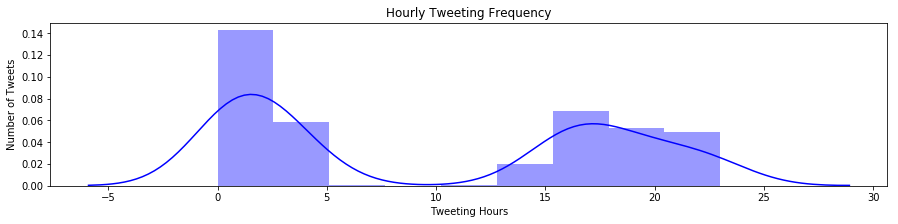

In [247]:
#  define plot size

plt.figure(figsize=(15, 3));

# create plot 

ax = sns.distplot((twitter_df['tweet_hour']), hist=True, color='Blue')

#  specfiy axis labels

ax.set(xlabel='Tweeting Hours',
       ylabel='Number of Tweets',
       title='Hourly Tweeting Frequency')

#  display plot 

plt.show()

Observed a time interval of low to no tweeting activity

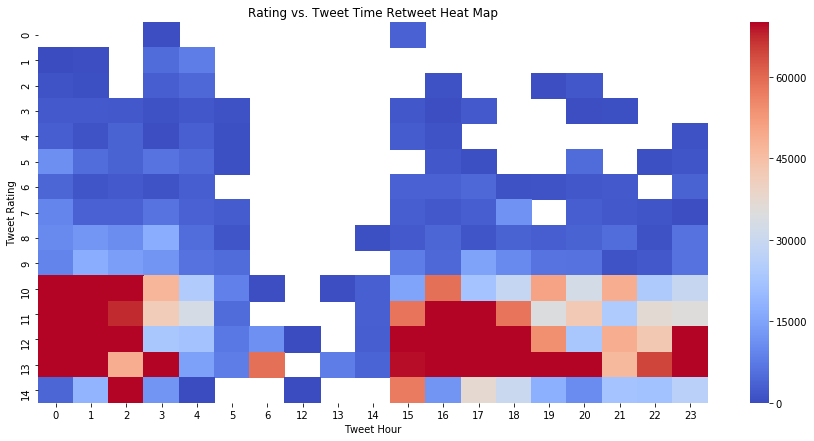

In [248]:
#  define plot size

plt.figure(figsize=(15, 7));

#   aggregate data to plot 

plt_data = twitter_df.pivot_table("retweet_count", "rating_numerator","tweet_hour", aggfunc='sum')

#  create plot

ax = sns.heatmap(plt_data, vmin=0, vmax=70000, cmap="coolwarm")

#  specfiy axis labels

ax.set(xlabel="Tweet Hour",
       ylabel="Tweet Rating",
       title="Rating vs. Tweet Time Retweet Heat Map",
       )


#  display plot

plt.show()




The rating 13 appears to have the highest retweet count through out tweeting active hours

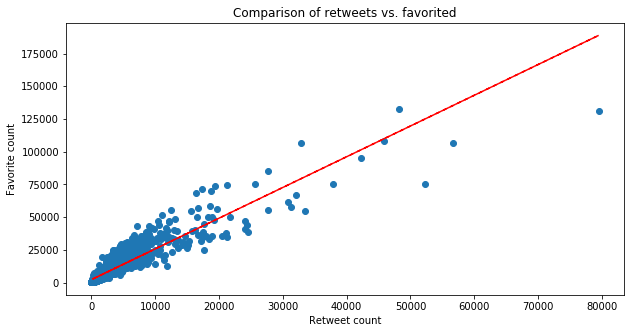

In [249]:
#  define plot size
plt.figure(figsize=(10, 5));


#  scatter plot relationship between retweeted and favorited tweets
plt.scatter(twitter_df['retweet_count'],twitter_df['favorite_count']);
plt.title("Comparison of retweets vs. favorited");
plt.xlabel("Retweet count");
plt.ylabel("Favorite count");


# calc the trendline
fit = np.polyfit(twitter_df['retweet_count'], twitter_df['favorite_count'], 1)
poly_line = np.poly1d(fit)

#  print trend line
plt.plot(twitter_df['retweet_count'],poly_line(twitter_df['retweet_count']),"r--");

Linear relationship observed between the number of retweets and the number of favorited tweets

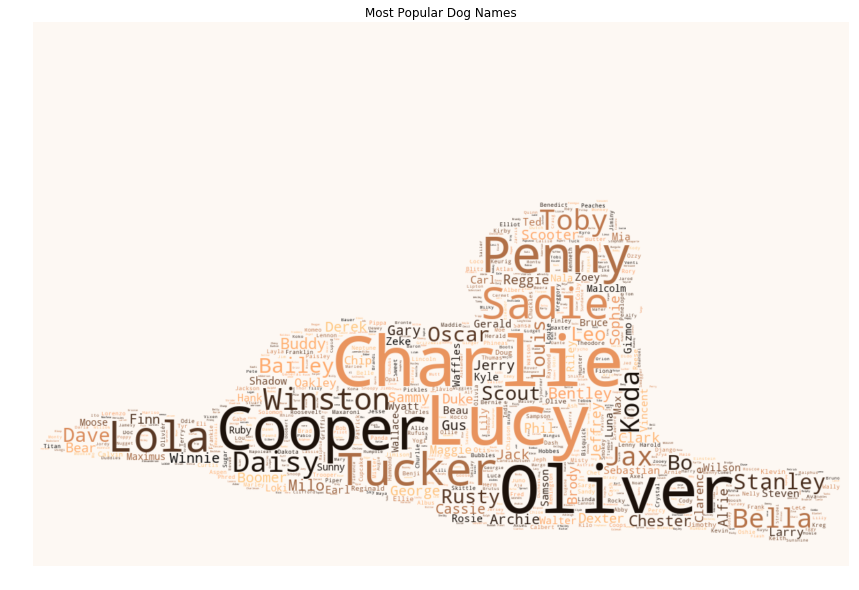

In [250]:
#  creating wordcloud with most frequent names for Dogs
#  Code reference - https://amueller.github.io/word_cloud/auto_examples/masked.html
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()


#  create the word cloud text excluding NaN
text = []
for name in twitter_df.dog_name.values:
    if name != np.nan:
        text.append(name)
text = ' '.join(map(str, text))
text = text.replace('nan','')


# read the image taken from
# https://th.bing.com/th/id/R.2c1a04313005b9d8cb14ac85d7235e55?rik=UUDLIG4gbpu2Ew&riu=http%3a%2f%2fclipart-library.com%2fimages_k%2fgolden-doodle-silhouette%2fgolden-doodle-silhouette-8.png&ehk=0Idq0MAysi3c8UvjM42EDHKV2%2bl33ARSwiyZgdKf23Y%3d&risl=&pid=ImgRaw&r=0

dog_coloring = np.array(Image.open(path.join(d, "golden-retriever.png")))

wc = WordCloud(width = 480, height = 480, background_color="#fdf8f3", max_words=5000, mask = dog_coloring,
               colormap="copper",max_font_size=100, random_state=42)
# generate word cloud
wc.generate(text)

#  show word cloud


plt.figure(figsize=(15, 10));
plt.axis("off")
plt.title("Most Popular Dog Names");
plt.imshow(wc, interpolation="bilinear");
plt.title("Most Popular Dog Names");

